# Import libs and data

In [51]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import pandas as pd
from tinydb import TinyDB, Query
from config import *

In [52]:
db = TinyDB(DB_FILE)
processed_table = db.table(TABLE_PROCESSED)

In [53]:
data = processed_table.all() 
df = pd.DataFrame(data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1198 non-null   object 
 1   min_salary         93 non-null     float64
 2   max_salary         82 non-null     float64
 3   salary_currency    113 non-null    object 
 4   minimum_education  1200 non-null   object 
 5   languages          1200 non-null   object 
 6   experience         766 non-null    float64
 7   responsibilities   1200 non-null   object 
 8   hard_skills        1200 non-null   object 
 9   soft_skills        1200 non-null   object 
 10  certifications     1200 non-null   object 
 11  benefits           1199 non-null   object 
 12  city               488 non-null    object 
 13  country            593 non-null    object 
 14  company_name       1198 non-null   object 
 15  company_size       880 non-null    object 
 16  employment_type    1197 

title  min_salary  max_salary salary_currency minimum_education  \
0  dotnet developer         NaN         NaN            None              none   
1  golang developer         NaN         NaN            None              none   
2     1c programmer         NaN         NaN            None          bachelor   
3     ios developer         NaN         NaN            None       unspecified   
4   devops engineer         NaN         NaN            None              none   

  languages  experience                                   responsibilities  \
0      [ro]         2.0                                                 []   
1      [en]         3.0  [traffic processing, ensure stability, design ...   
2  [ro, ru]         1.0                                                 []   
3  [ro, ru]         1.0  [develop, maintain, optimize, collaborate, debug]   
4      [en]         3.0  [analyze, design, develop, build, test, deploy...   

                                         hard_skills  \
0                                           [dotnet]   
1  [golang, http, https, multithreading, sql, gra...   
2                                               [1c]   
3  [swift, swiftui, cocoapods, git, oop, mvc, mvv...   
4  [aws, amazon cloudwatch, azure, cicd, docker, ...   

                   soft_skills  ... company_size employment_type  \
0                           []  ...         None       full-time   
1  [teamwork, problem solving]  ...         None       full-time   
2                           []  ...         None       full-time   
3                           []  ...         None       full-time   
4                           []  ...         None       full-time   

  work_schedule contract_type remote_work job_categories        date  \
0          None          None     on-site  [programming]  30/05/2025   
1      flexible     permanent      hybrid  [programming]  30/05/2025   
2      standard     permanent     on-site  [programming]  30/05/2025   
3      standard     permanent     on-site  [programming]  30/05/2025   
4      standard     permanent     on-site  [programming]  30/05/2025   

      source                                        occurrences  \
0  robota.md  [03/06/2025, 02/06/2025, 10/06/2025, 07/06/202...   
1  robota.md   [31/05/2025, 02/06/2025, 30/05/2025, 01/06/2025]   
2  robota.md  [03/06/2025, 02/06/2025, 10/06/2025, 07/06/202...   
3  robota.md  [03/06/2025, 02/06/2025, 10/06/2025, 07/06/202...   
4  robota.md  [03/06/2025, 02/06/2025, 10/06/2025, 07/06/202...   

                                        original_url  
0  https://www.rabota.md/ro/joburi/middle-net-dev...  
1  https://www.rabota.md/ro/locuri-de-munca/middl...  
2  https://www.rabota.md/ro/locuri-de-munca/progr...  
3  https://www.rabota.md/ro/locuri-de-munca/ios-d...  
4  https://www.rabota.md/ro/locuri-de-munca/devop...  

[5 rows x 25 columns]

# Disable a datasource

In [54]:
# Specify the source to drop
# source_to_drop = "linkedin.com"
# source_to_drop = "robota.md"

# Drop rows where the source matches
# df = df[df["source"] != source_to_drop].reset_index(drop=True)


In [55]:
# Keep only moldova jobs
# df = df[df["country"] == "moldova"].reset_index(drop=True)

# Query for tech skill occurences

In [56]:
import pandas as pd

keyword = 'openai'  # your search keyword

filtered_df = df[df['hard_skills'].apply(lambda skills: keyword.lower() in [s.lower() for s in skills] if isinstance(skills, list) else False)]


print(f"Number of entities found with hard_skill '{keyword}': {len(filtered_df)}\n")

from tabulate import tabulate

print(tabulate(filtered_df[['title', 'hard_skills']], headers='keys', tablefmt='grid'))



Number of entities found with hard_skill 'openai': 3

+-----+--------------------------+----------------------------------------------------------------------------------------------+
|     | title                    | hard_skills                                                                                  |
+=====+==========================+==============================================================================================+
|  67 | ai engineer              | ['python', 'fastapi', 'llm', 'openai', 'postgresql', 'redis', 'rest', 'git', 'sql', 'nosql'] |
+-----+--------------------------+----------------------------------------------------------------------------------------------+
| 537 | python developer         | ['python', 'tensorflow', 'pytorch', 'openai', 'restful', 'web scraping']                     |
+-----+--------------------------+----------------------------------------------------------------------------------------------+
| 923 | backend python developer | [

# Plot daily open vacancies

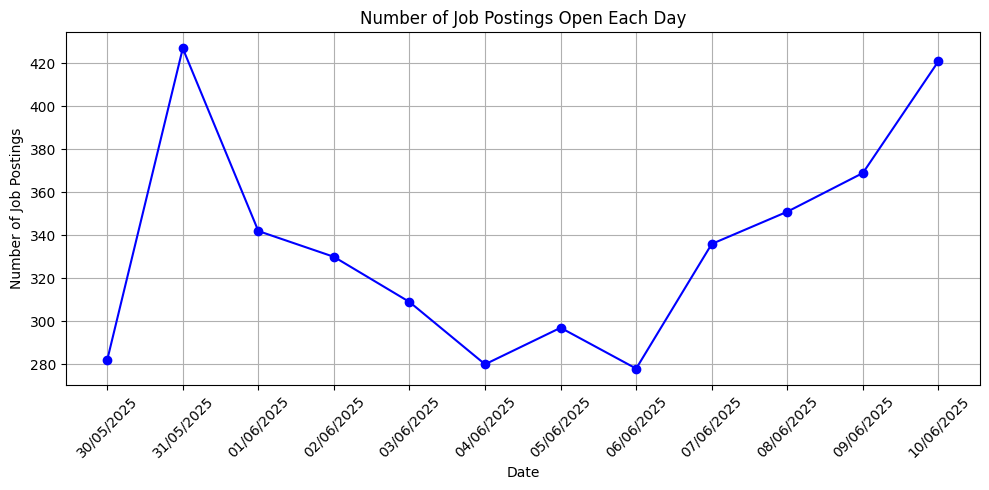

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import Counter
from utils import parse_date

# Flatten occurrence dates
all_dates = []
for occ_list in df['occurrences'].dropna():
    if isinstance(occ_list, list):
        all_dates.extend(occ_list)
    elif isinstance(occ_list, str):
        all_dates.append(occ_list)

# Parse dates
date_objects = [parse_date(d) for d in all_dates]

# Count occurrences per date
date_counts = Counter(date_objects)

# Sort dates
sorted_dates = sorted(date_counts.items())
dates, counts = zip(*sorted_dates)

plt.figure(figsize=(10, 5))
plt.plot(dates, counts, marker='o', linestyle='-', color='b')

plt.title("Number of Job Postings Open Each Day")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(True)

# Set major locator and formatter for dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # Tick every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))  # Format as DD/MM/YYYY

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



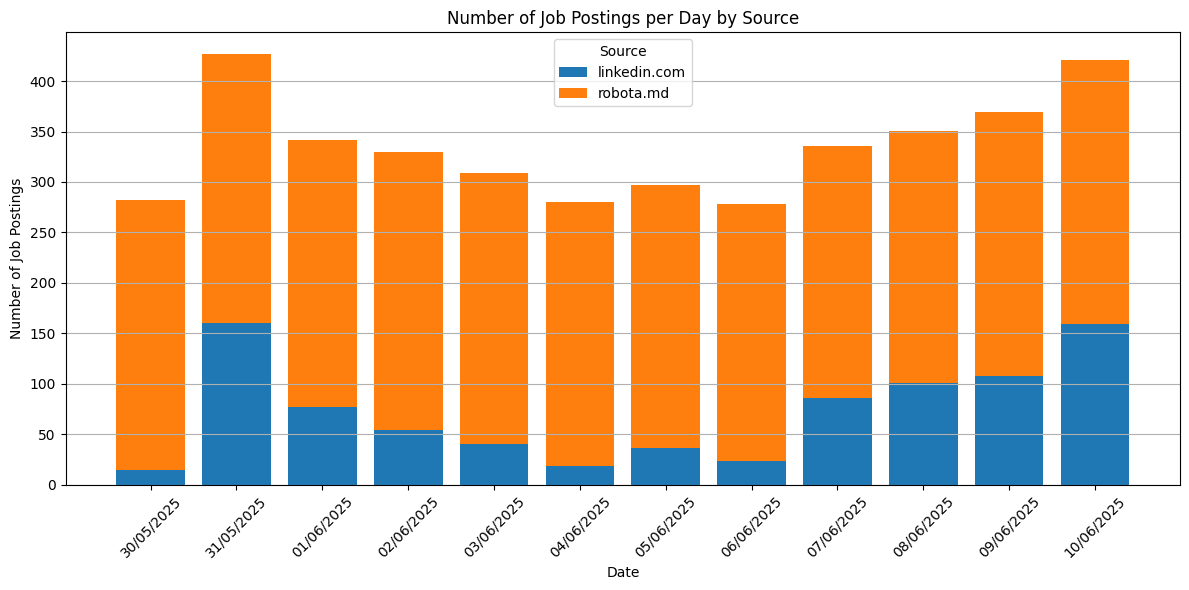

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from utils import parse_date
import pandas as pd

# Prepare nested dictionary: {date: {source: count}}
date_source_counts = defaultdict(lambda: defaultdict(int))

for idx, row in df.dropna(subset=['occurrences', 'source']).iterrows():
    source = row['source']
    occ_list = row['occurrences']
    
    if not isinstance(occ_list, list):
        occ_list = [occ_list]
    
    for d in occ_list:
        date_obj = parse_date(d)
        date_source_counts[date_obj][source] += 1

# Get sorted unique dates
all_dates = sorted(date_source_counts.keys())

# Get list of all sources
all_sources = sorted({source for counts in date_source_counts.values() for source in counts})

# Prepare data for stacked bar chart
counts_per_source = {source: [] for source in all_sources}

for date in all_dates:
    counts_for_date = date_source_counts[date]
    for source in all_sources:
        counts_per_source[source].append(counts_for_date.get(source, 0))

# Plot stacked bars
plt.figure(figsize=(12, 6))
bottom = [0] * len(all_dates)

for source in all_sources:
    plt.bar(all_dates, counts_per_source[source], bottom=bottom, label=source)
    bottom = [sum(x) for x in zip(bottom, counts_per_source[source])]

plt.title("Number of Job Postings per Day by Source")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid(axis='y')

# Format x-axis dates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

plt.xticks(rotation=45)
plt.legend(title="Source")
plt.tight_layout()
plt.show()


## Jobs alive

X-axis spans 12 days from 2025-05-30 00:00:00 to 2025-06-10 00:00:00
DEBUG: Examining first 10 jobs:
Job 1:
  Occurrences: ['03/06/2025', '02/06/2025', '10/06/2025', '07/06/2025', '31/05/2025', '06/06/2025', '05/06/2025', '30/05/2025', '04/06/2025', '09/06/2025']
  Start date (min occurrence): 2025-05-30 00:00:00
  End date (max occurrence): 2025-06-10 00:00:00
  Duration: 11 days
  Same day? False

Multi-day job example: starts 2025-05-30, ends 2025-06-10, duration: 11 days
Job 2:
  Occurrences: ['31/05/2025', '02/06/2025', '30/05/2025', '01/06/2025']
  Start date (min occurrence): 2025-05-30 00:00:00
  End date (max occurrence): 2025-06-02 00:00:00
  Duration: 3 days
  Same day? False

Multi-day job example: starts 2025-05-30, ends 2025-06-02, duration: 3 days
Job 3:
  Occurrences: ['03/06/2025', '02/06/2025', '10/06/2025', '07/06/2025', '31/05/2025', '06/06/2025', '05/06/2025', '30/05/2025', '04/06/2025', '09/06/2025', '08/06/2025', '01/06/2025']
  Start date (min occurrence): 2025-

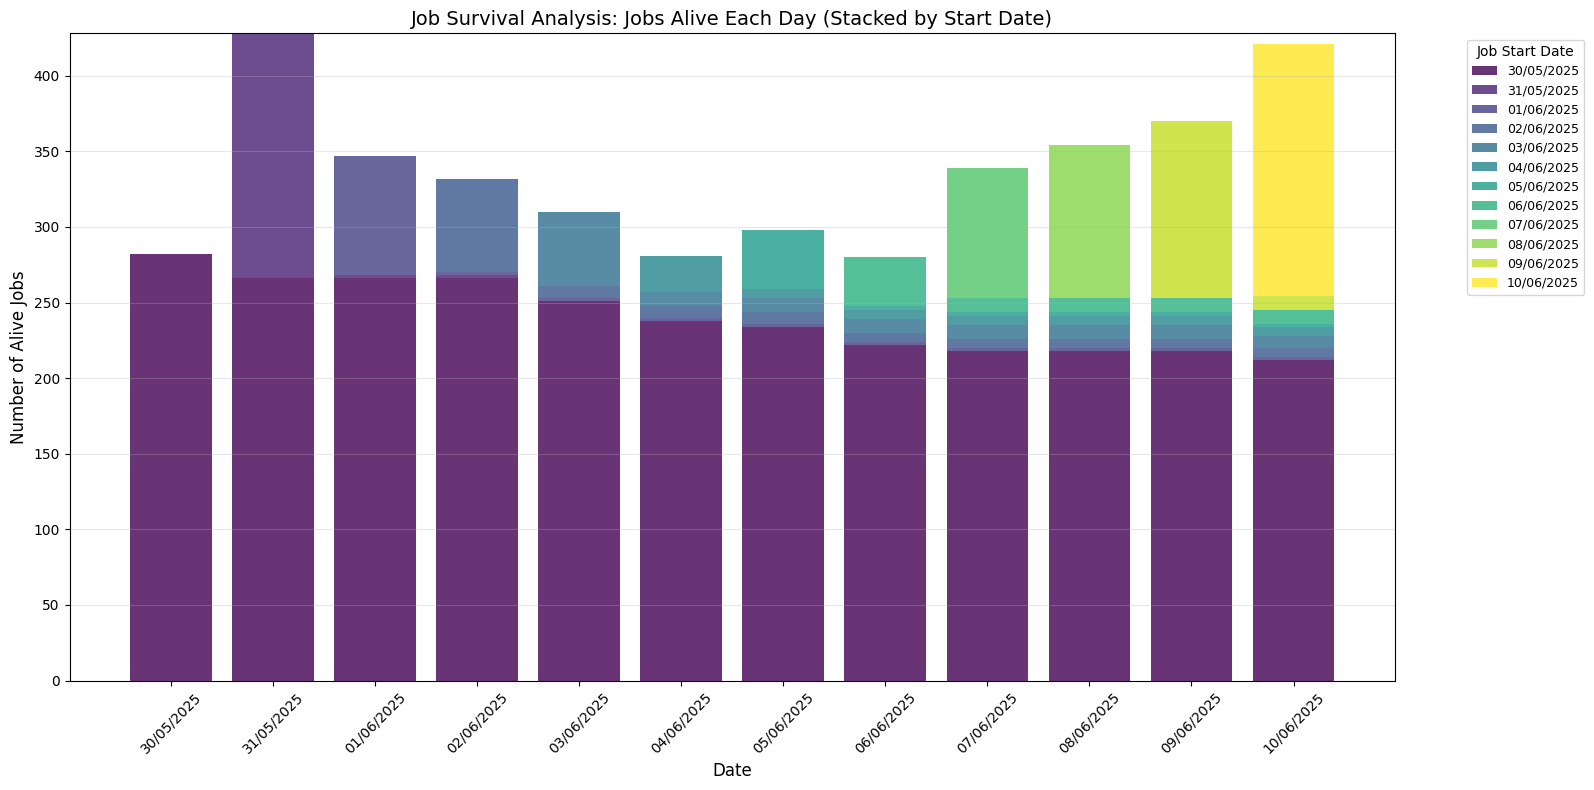


Summary:
Peak alive jobs: 428 on 31/05/2025
Average jobs alive per day: 336.8

Evolution of jobs from first 3 start dates:
  30/05/2025: Peak 282 jobs, lasted 12 days
  31/05/2025: Peak 162 jobs, lasted 3 days
  01/06/2025: Peak 79 jobs, lasted 10 days


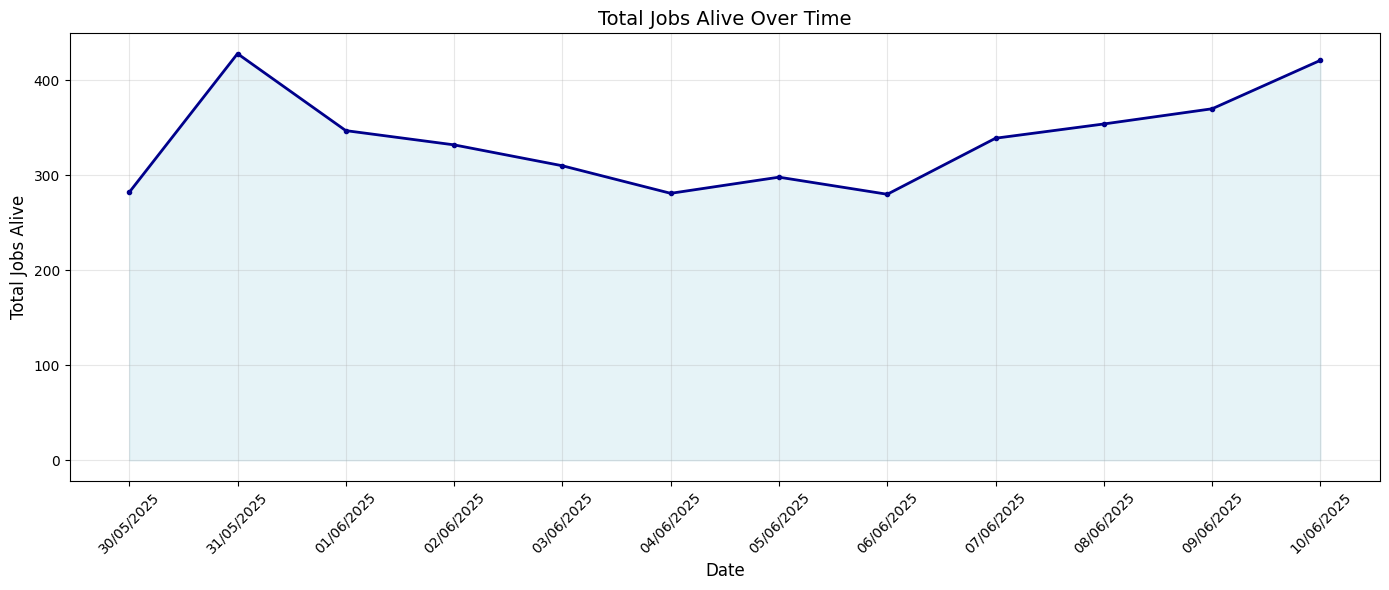

In [59]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from collections import defaultdict
from utils import parse_date

# Get all unique dates for x-axis (from both date column and occurrences)
all_dates = set()

# Add dates from date column
for d in df['date'].dropna():
    all_dates.add(parse_date(d))

# Add dates from occurrences
for idx, row in df.iterrows():
    occ_value = row['occurrences']
    try:
        # Skip if None or empty
        if occ_value is None:
            continue
        
        # Handle different data types
        if isinstance(occ_value, (list, np.ndarray)):
            occ_list = occ_value
        else:
            # Single value or string
            occ_list = [occ_value]
        
        for occ_date in occ_list:
            try:
                if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                    all_dates.add(parse_date(occ_date))
            except:
                continue  # Skip invalid dates
    except:
        continue  # Skip problematic rows

# Sort all dates for x-axis
x_axis_dates = sorted(all_dates)
print(f"X-axis spans {len(x_axis_dates)} days from {x_axis_dates[0]} to {x_axis_dates[-1]}")

# For each x-axis date, count how many jobs from each start date are still alive
survival_data = {}  # {start_date: [count_day1, count_day2, ...]}

# Process each job
job_count = 0
multi_day_jobs = 0

print("DEBUG: Examining first 10 jobs:")
debug_count = 0

for idx, row in df.dropna(subset=['occurrences']).iterrows():
    occ_list = row['occurrences']
    if not isinstance(occ_list, list):
        occ_list = [occ_list]
    
    # Parse all occurrence dates
    parsed_occurrences = []
    for occ_date in occ_list:
        try:
            if occ_date is not None and str(occ_date).strip() != '' and str(occ_date).lower() != 'nan':
                parsed_occurrences.append(parse_date(occ_date))
        except:
            continue
    
    if not parsed_occurrences:
        continue
        
    # Find start and end dates from occurrences
    start_date = min(parsed_occurrences)
    end_date = max(parsed_occurrences)
    
    job_count += 1
    
    # Initialize survival data for this start date if needed
    if start_date not in survival_data:
        survival_data[start_date] = [0] * len(x_axis_dates)
    
    # Debug first 10 jobs
    if debug_count < 10:
        print(f"Job {debug_count + 1}:")
        print(f"  Occurrences: {occ_list}")
        print(f"  Start date (min occurrence): {start_date}")
        print(f"  End date (max occurrence): {end_date}") 
        print(f"  Duration: {(end_date - start_date).days} days")
        print(f"  Same day? {start_date.date() == end_date.date()}")
        print()
        debug_count += 1
    
    # Check if job lives more than one day
    if (end_date - start_date).days > 0:
        multi_day_jobs += 1
        if multi_day_jobs <= 5:  # Show first 5 examples
            print(f"Multi-day job example: starts {start_date.strftime('%Y-%m-%d')}, ends {end_date.strftime('%Y-%m-%d')}, duration: {(end_date - start_date).days} days")
    
    # OPTION 1: Mark job as alive from start to end date (continuous survival)
    for day_idx, current_day in enumerate(x_axis_dates):
        if start_date <= current_day <= end_date:
            survival_data[start_date][day_idx] += 1
    
    # OPTION 2: Only mark job as alive on days it was actually observed
    # Uncomment these lines and comment out the above loop to use this approach:
    # for occurrence_date in parsed_occurrences:
    #     if occurrence_date in x_axis_dates:
    #         day_idx = x_axis_dates.index(occurrence_date)
    #         survival_data[start_date][day_idx] += 1

print(f"Total jobs processed: {job_count}")
print(f"Jobs lasting more than 1 day: {multi_day_jobs}")
print(f"Percentage of multi-day jobs: {multi_day_jobs/job_count*100:.1f}%")

# Sort start dates (oldest first for bottom stacking)
start_dates_sorted = sorted(survival_data.keys())

print(f"Found {len(start_dates_sorted)} different start dates")
print(f"Total jobs analyzed: {job_count}")

# DEBUG: Show the survival matrix
print(f"\nSurvival Matrix (rows=start_dates, cols=timeline_days):")
print("Start Date    ->", " | ".join([d.strftime('%m/%d') for d in x_axis_dates]))
for start_date in start_dates_sorted:
    counts = survival_data[start_date]
    print(f"{start_date.strftime('%m/%d')} -> {counts}")

# Check if we have any cross-day survival
total_per_day = [sum(survival_data[start_date][day_idx] for start_date in start_dates_sorted) 
                 for day_idx in range(len(x_axis_dates))]
print(f"\nTotal jobs per day: {total_per_day}")

# Check how many start dates contribute to each day
for day_idx, day in enumerate(x_axis_dates):
    contributing_starts = [start_date for start_date in start_dates_sorted 
                          if survival_data[start_date][day_idx] > 0]
    if len(contributing_starts) > 1:
        print(f"Day {day.strftime('%m/%d')} has jobs from {len(contributing_starts)} different start dates: {[d.strftime('%m/%d') for d in contributing_starts]}")

# Create the stacked bar chart
plt.figure(figsize=(16, 8))

# Use a more professional color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(start_dates_sorted)))

x = np.arange(len(x_axis_dates))
bottom = np.zeros(len(x_axis_dates))

# Stack from oldest (bottom) to newest (top)
for i, start_date in enumerate(start_dates_sorted):
    counts = survival_data[start_date]
    
    # Only plot if there are any jobs from this start date
    if max(counts) > 0:
        plt.bar(x, counts, bottom=bottom, color=colors[i], width=0.8,
                label=start_date.strftime('%d/%m/%Y'), alpha=0.8)
        bottom += counts

plt.title("Job Survival Analysis: Jobs Alive Each Day (Stacked by Start Date)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Alive Jobs", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Format x-axis
ax = plt.gca()
step = max(1, len(x)//15)  # Show ~15 labels
ax.set_xticks(x[::step])
ax.set_xticklabels([d.strftime('%d/%m/%Y') for d in x_axis_dates[::step]], rotation=45)

# Legend (limit if too many start dates)
if len(start_dates_sorted) <= 15:
    plt.legend(title="Job Start Date", bbox_to_anchor=(1.05, 1), loc='upper left',
              fontsize=9, title_fontsize=10)
else:
    # Just show text about number of cohorts if too many
    plt.text(1.02, 0.5, f"{len(start_dates_sorted)} different\nstart dates\n(oldest at bottom)", 
             transform=ax.transAxes, fontsize=10, verticalalignment='center')

plt.tight_layout()
plt.show()

# Print some statistics
peak_day_idx = np.argmax(total_per_day)
peak_count = total_per_day[peak_day_idx]
peak_date = x_axis_dates[peak_day_idx]

print(f"\nSummary:")
print(f"Peak alive jobs: {peak_count} on {peak_date.strftime('%d/%m/%Y')}")
print(f"Average jobs alive per day: {np.mean(total_per_day):.1f}")

# Show how jobs from first few start dates evolve
print(f"\nEvolution of jobs from first 3 start dates:")
for i, start_date in enumerate(start_dates_sorted[:3]):
    counts = survival_data[start_date]
    max_count = max(counts)
    days_alive = len([c for c in counts if c > 0])
    print(f"  {start_date.strftime('%d/%m/%Y')}: Peak {max_count} jobs, lasted {days_alive} days")

# Simple line plot showing total alive jobs
plt.figure(figsize=(14, 6))
plt.plot(x, total_per_day, marker='o', linewidth=2, markersize=3, color='darkblue')
plt.fill_between(x, total_per_day, alpha=0.3, color='lightblue')
plt.title("Total Jobs Alive Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Jobs Alive", fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.set_xticks(x[::step])
ax.set_xticklabels([d.strftime('%d/%m/%Y') for d in x_axis_dates[::step]], rotation=45)

plt.tight_layout()
plt.show()

# Most common keywords in job titles

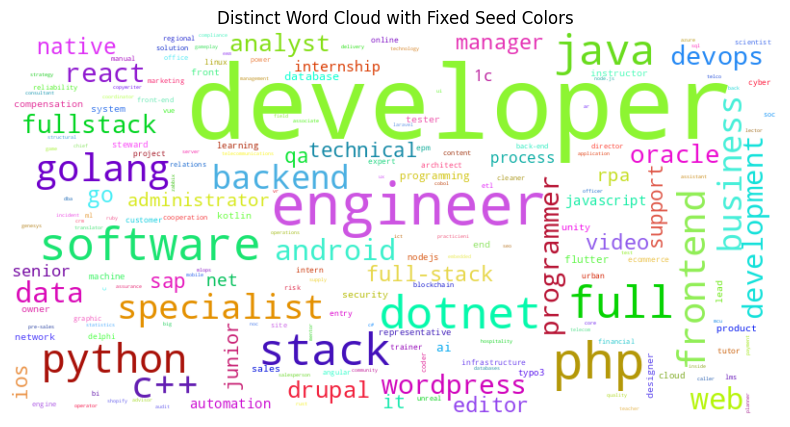

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import random

# 1. Get word frequencies
all_words = [word for title in df['title'].dropna() for word in title.split()]
word_counts = Counter(all_words)
words = list(word_counts.keys())

# 2. Generate n distinct HSL colors using evenly spaced hues
def generate_distinct_colors(n, seed=42):
    random.seed(seed)
    hues = list(range(0, 360, 360 // n))
    random.shuffle(hues)
    return [
        f"hsl({h}, {random.randint(70, 100)}%, {random.randint(35, 65)}%)"
        for h in hues
    ]

# 3. Build color map: word → color
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

# 4. Custom color function using precomputed map
def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# 5. Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func
).generate_from_frequencies(word_counts)

# 6. Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distinct Word Cloud with Fixed Seed Colors')
plt.show()

## Most common keywords in processed data of rabota.md and linkedin.com

Analyzing columns: ['title', 'min_salary', 'max_salary', 'minimum_education', 'languages', 'experience', 'responsibilities', 'hard_skills', 'soft_skills', 'certifications', 'benefits', 'company_name', 'company_size', 'employment_type', 'work_schedule', 'contract_type', 'remote_work', 'job_categories', 'original_url']
Total records: 1200
Extracting words from processed data...
Processing column: title
Processing column: min_salary
Processing column: max_salary
Processing column: minimum_education
Processing column: languages
Processing column: experience
Processing column: responsibilities
Processing column: hard_skills
Processing column: soft_skills
Processing column: certifications
Processing column: benefits
Processing column: company_name
Processing column: company_size
Processing column: employment_type
Processing column: work_schedule
Processing column: contract_type
Processing column: remote_work
Processing column: job_categories
Processing column: original_url
Total words extrac

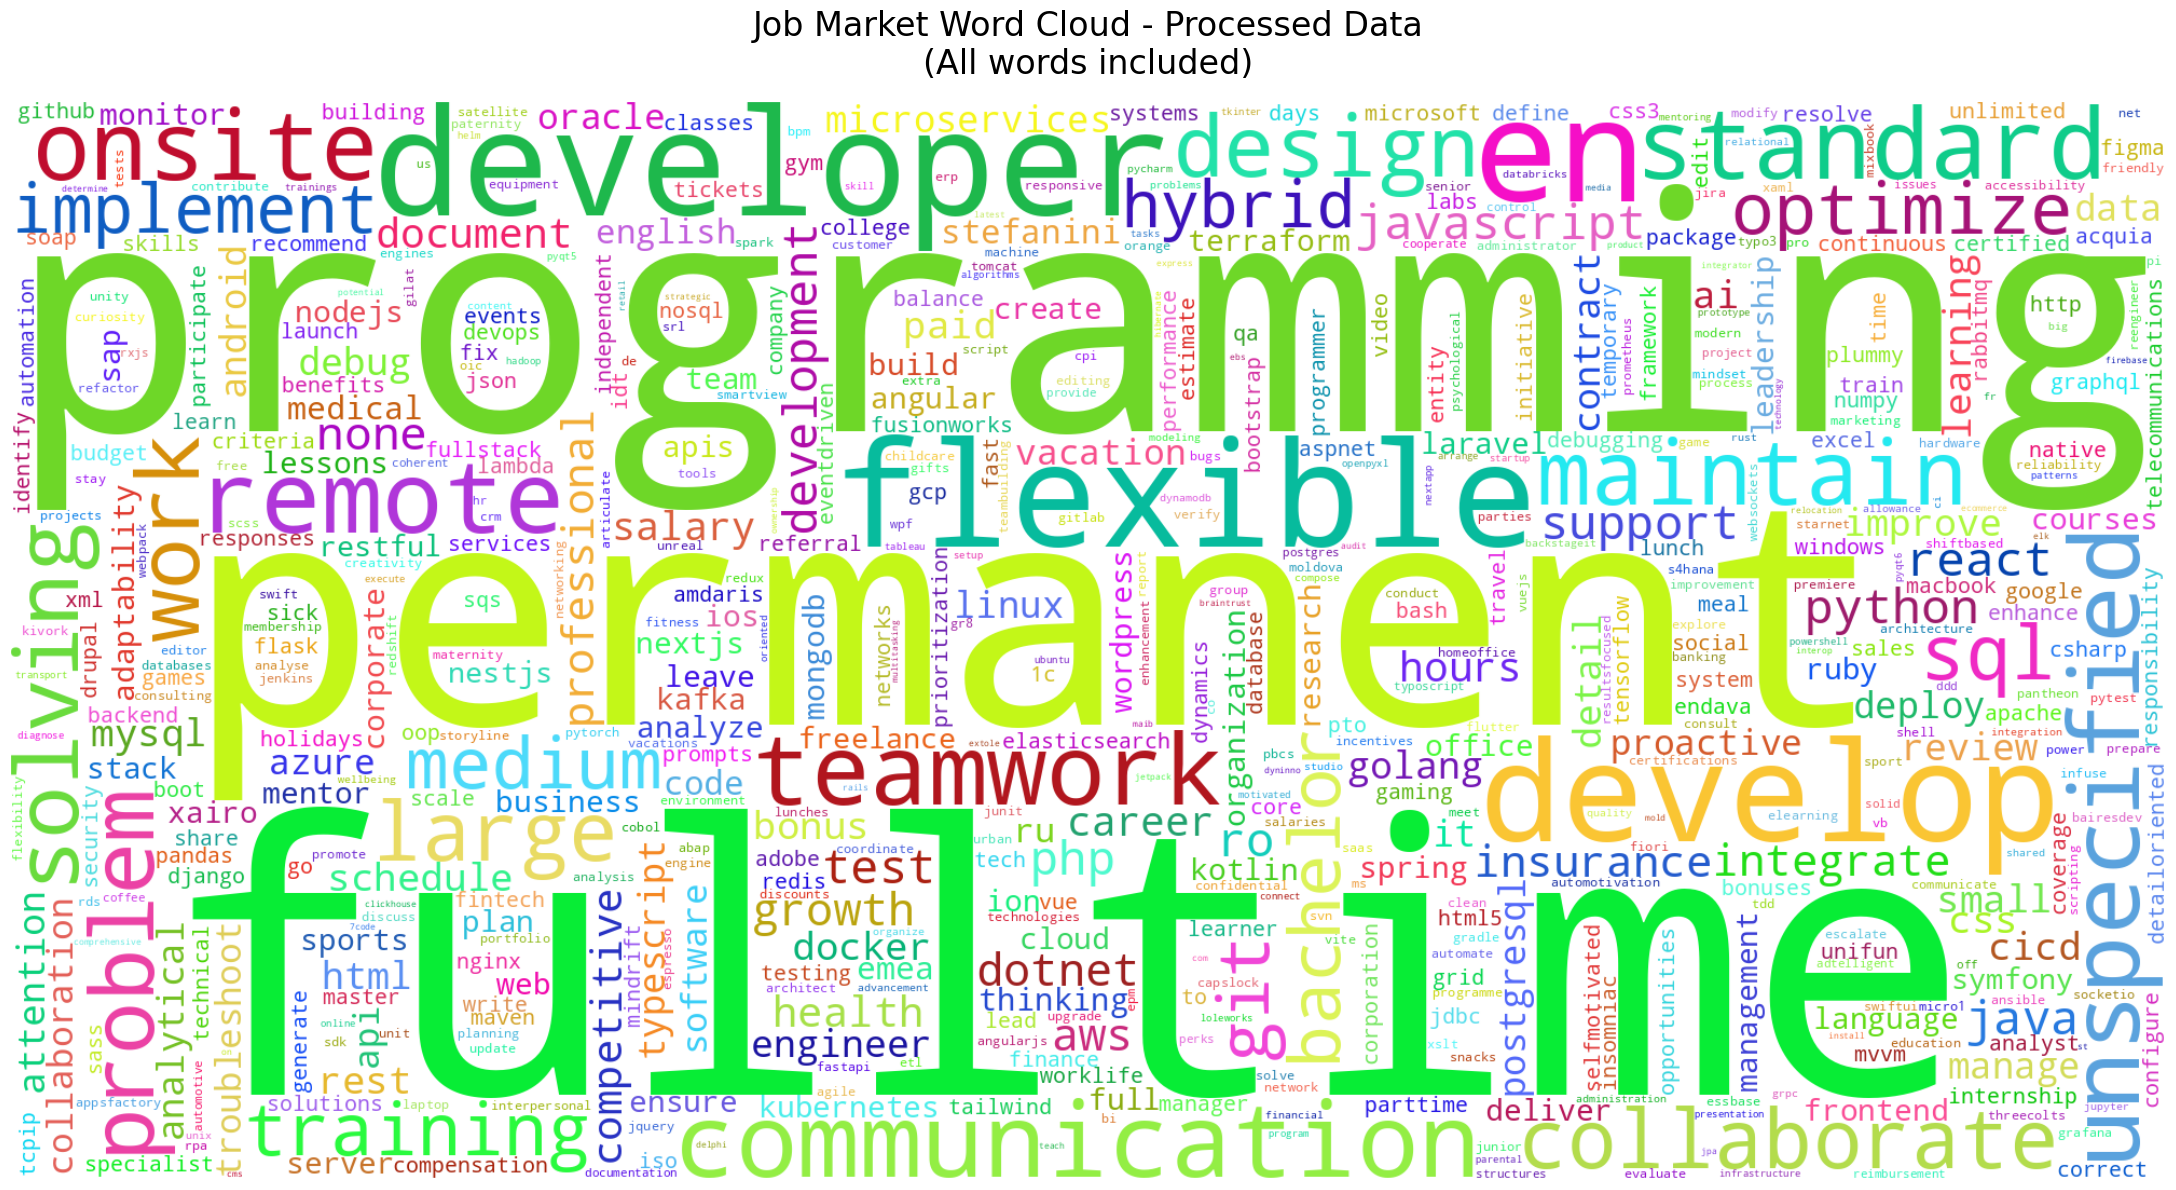


Word Cloud Statistics:
- Total records analyzed: 1200
- Columns analyzed: 19
- Words displayed: 2973
- Most common words: [('fulltime', 1112), ('programming', 1053), ('permanent', 975), ('developer', 864), ('flexible', 834), ('en', 810), ('develop', 749), ('communication', 700), ('remote', 672), ('standard', 632), ('teamwork', 629), ('unspecified', 615), ('onsite', 599), ('maintain', 516), ('problem', 499)]


In [61]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import pandas as pd
import re

# Use the already loaded processed dataframe (df)
# Exclude 'date' and 'occurrences' columns from analysis
columns_to_exclude = ['date', 'occurrences', 'source', 'salary_min', 'salary_max', 'salary_currency', 'city', 'country', 'company_industry']
columns_to_analyze = [col for col in df.columns if col not in columns_to_exclude]

print(f"Analyzing columns: {columns_to_analyze}")
print(f"Total records: {len(df)}")

def clean_word(word):
    """Basic word cleaning - only remove punctuation"""
    # Remove punctuation and normalize
    word = re.sub(r'[^\w]', '', word).lower().strip()
    
    # Skip if too short or numeric
    if len(word) < 2 or word.isdigit():
        return None
    
    return word

def extract_words_from_processed_df(df, columns_to_analyze):
    """Extract words from all specified columns"""
    all_words = []
    
    for col in columns_to_analyze:
        if col in df.columns:
            print(f"Processing column: {col}")
            for val in df[col].dropna():
                if isinstance(val, list):
                    for item in val:
                        words = str(item).split()
                        for word in words:
                            cleaned = clean_word(word)
                            if cleaned:
                                all_words.append(cleaned)
                else:
                    words = str(val).split()
                    for word in words:
                        cleaned = clean_word(word)
                        if cleaned:
                            all_words.append(cleaned)
    
    return all_words

# Extract words from processed dataframe
print("Extracting words from processed data...")
all_words = extract_words_from_processed_df(df, columns_to_analyze)
print(f"Total words extracted: {len(all_words)}")

# Count word frequencies
word_counts = Counter(all_words)
print(f"Unique words: {len(word_counts)}")
print(f"Top 10 words: {word_counts.most_common(10)}")

words = list(word_counts.keys())

# Generate distinct HSL colors with better distribution
def generate_distinct_colors(n, seed=42):
    """Generate visually distinct colors using golden angle"""
    random.seed(seed)
    if n == 0:
        return []
    
    colors = []
    golden_angle = 137.508  # Golden angle in degrees
    
    for i in range(n):
        hue = (i * golden_angle) % 360
        saturation = random.randint(65, 95)  # High saturation
        lightness = random.randint(35, 65)   # Medium lightness
        colors.append(f"hsl({hue:.0f}, {saturation}%, {lightness}%)")
    
    return colors

# Create word-color map
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# Generate word cloud
wordcloud = WordCloud(
    max_words=1000,
    width=2000,
    height=1000,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func,
    relative_scaling=0.5,
    min_font_size=8
).generate_from_frequencies(word_counts)

# Plot
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Market Word Cloud - Processed Data\n(All words included)', 
          fontsize=24, pad=20)
plt.tight_layout()
plt.show()

# Print statistics
print(f"\nWord Cloud Statistics:")
print(f"- Total records analyzed: {len(df)}")
print(f"- Columns analyzed: {len(columns_to_analyze)}")
print(f"- Words displayed: {len(word_counts)}")
print(f"- Most common words: {word_counts.most_common(15)}")

## Most common keywords in raw data of rabota.md and linkedin.com

Extracting words from Robota...
Processing robota column: vacancy-title
Processing robota column: company-title
Processing robota column: sidebar
Processing robota column: vacancy-content
Robota words extracted: 36972
Extracting words from LinkedIn...
Processing linkedin column: job_title
Processing linkedin column: company_name
Processing linkedin column: job_description
Processing linkedin column: seniority_level
Processing linkedin column: employment_type
Processing linkedin column: industries
Processing linkedin column: skills
LinkedIn words extracted: 190420
Total unique words (min freq 2): 7304
Top 10 words: [('design', 1886), ('develop', 1147), ('code', 1014), ('build', 955), ('learn', 937), ('busi', 932), ('understand', 895), ('services', 890), ('technical', 881), ('solutions', 853)]


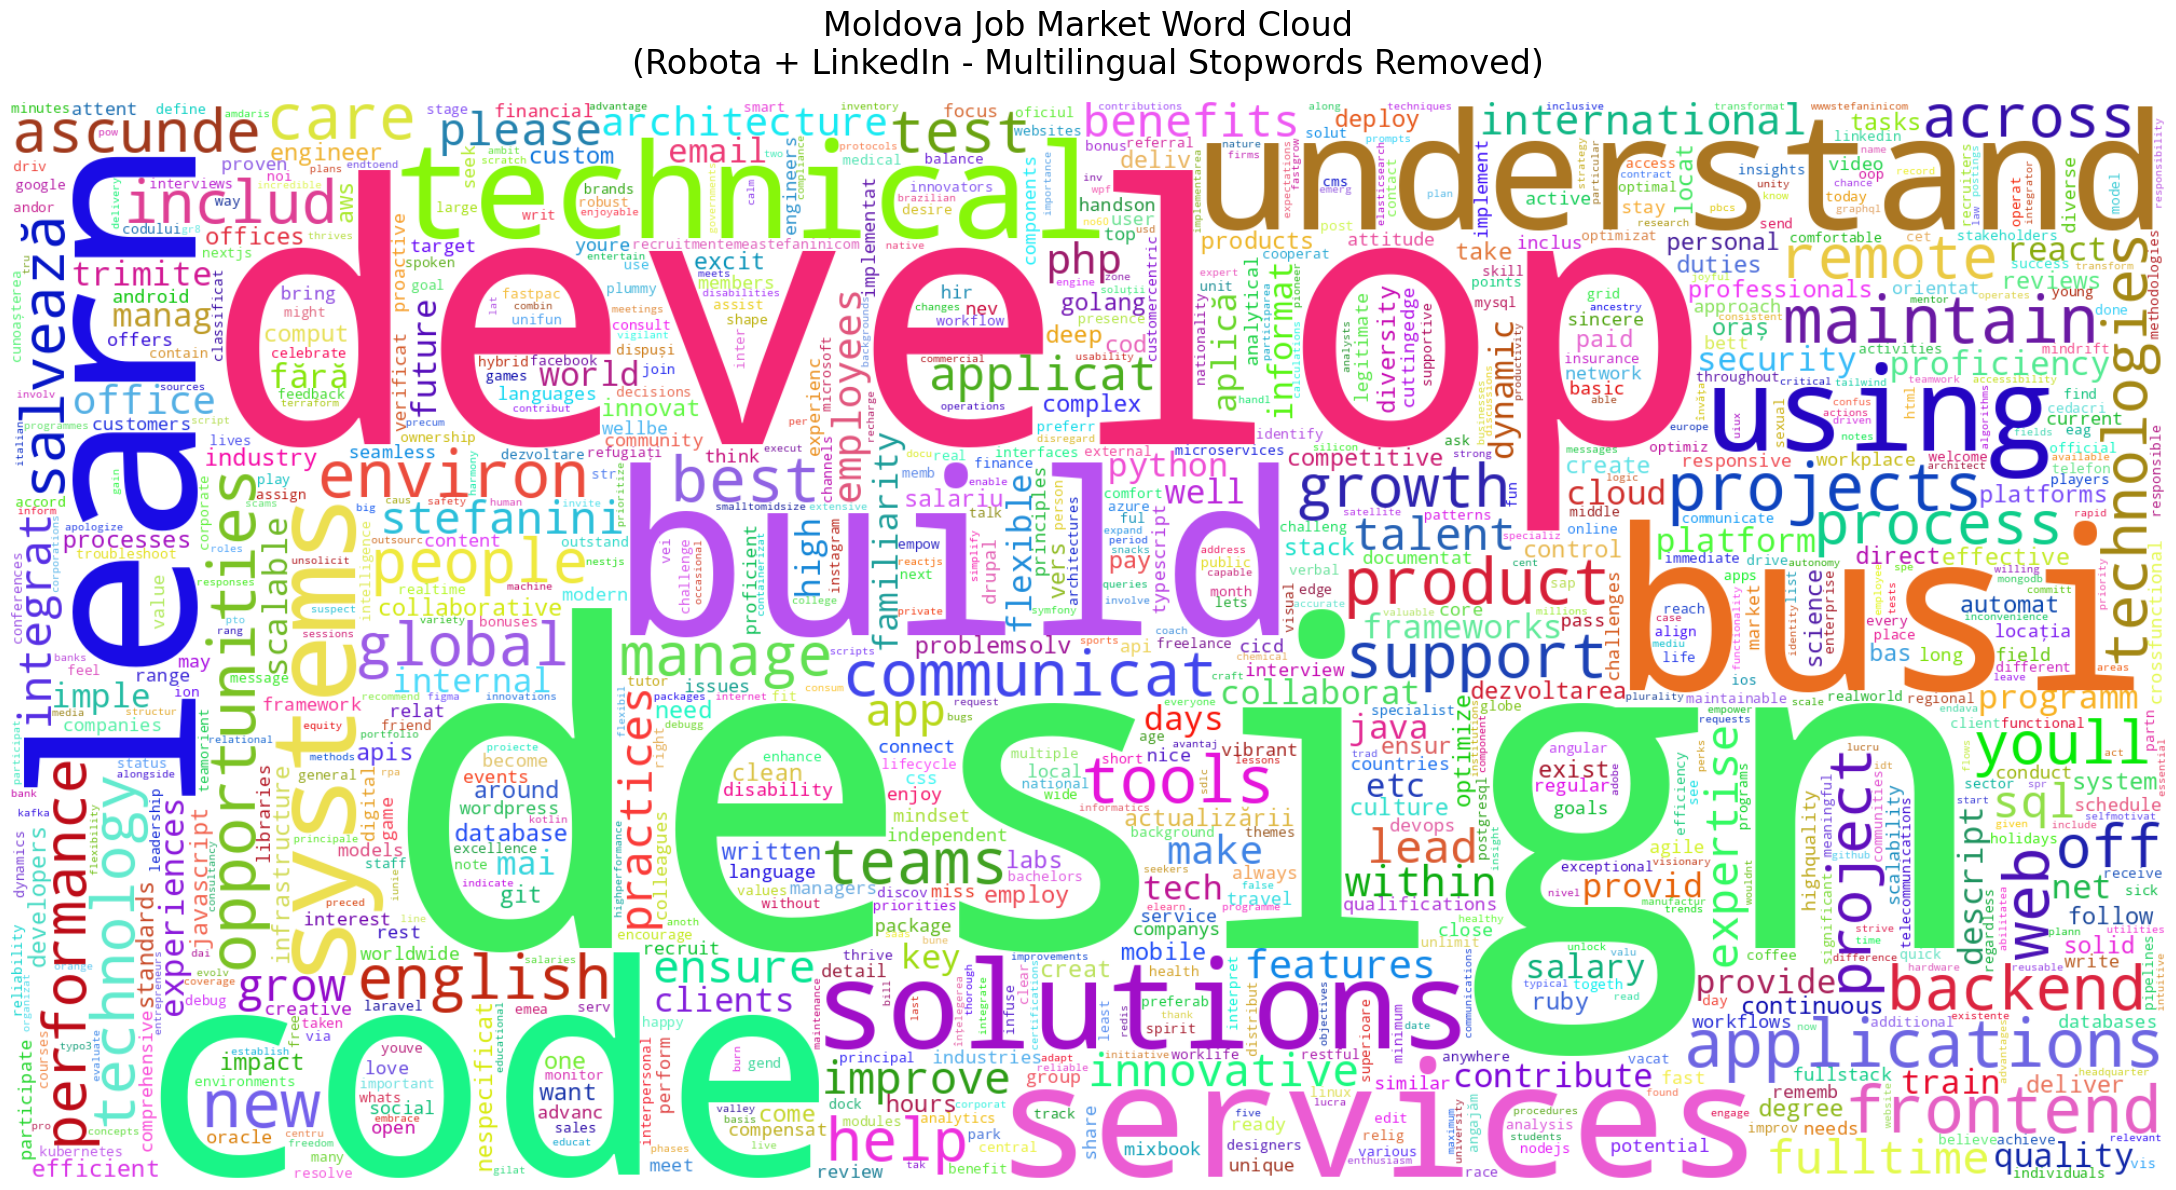


Word Cloud Statistics:
- Total jobs analyzed: 324 (Robota) + 877 (LinkedIn)
- Words displayed: 7304
- Most common technical terms: ['design', 'develop', 'build', 'learn', 'understand', 'services', 'technical', 'solutions', 'systems', 'using']


In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import random
import pandas as pd
import re

# Load data from raw tables
robota_df = pd.DataFrame(db.table(TABLE_ROBOTA_MD_RAW).all())
linkedin_df = pd.DataFrame(db.table(TABLE_LINKEDIN_RAW).all())

# Define source-specific fields
robota_columns = ['vacancy-title', 'company-title', 'sidebar', 'vacancy-content']
linkedin_columns = ['job_title', 'company_name', 'job_description', 'seniority_level', 'employment_type', 'industries', 'skills']

# Comprehensive stopwords (English + Romanian + Russian + Job-specific)
stopwords = set(STOPWORDS)

# Romanian stopwords
romanian_stopwords = {
    'și', 'în', 'de', 'la', 'cu', 'pe', 'pentru', 'din', 'către', 'sau', 'dar', 'că', 'cel', 'cea', 'cei', 'cele',
    'un', 'una', 'unei', 'unui', 'acestui', 'acestei', 'această', 'acest', 'aceste', 'aceștia', 'acestea',
    'muncă', 'munca', 'locul', 'locului', 'angajatorului', 'angajator', 'nu', 'contează', 'data', 'datei',
    'experiența', 'experiență', 'ani', 'anul', 'program', 'programul', 'full', 'time', 'part', 'studii',
    'căutare', 'căutări', 'locuri', 'joburi', 'job', 'poziție', 'poziția', 'candidat', 'candidatul', 'candidați',
    'responsabilități', 'responsabilitate', 'cerințe', 'cerință', 'competențe', 'competența', 'abilități', 'abilitate',
    'cunoștințe', 'cunoaștere', 'echipa', 'echipă', 'companie', 'compania', 'firma', 'firmă', 'aplicant', 'aplicanți'
}

# Russian stopwords
russian_stopwords = {
    'и', 'в', 'на', 'с', 'по', 'для', 'от', 'за', 'к', 'до', 'из', 'у', 'о', 'об', 'не', 'что', 'как', 'это',
    'все', 'или', 'так', 'его', 'её', 'их', 'мы', 'вы', 'он', 'она', 'они', 'наш', 'ваш', 'их', 'этот', 'эта', 'эти',
    'работа', 'работы', 'работе', 'работу', 'место', 'места', 'опыт', 'опыта', 'год', 'года', 'лет', 'компания', 'компании',
    'кандидат', 'кандидата', 'требования', 'требование', 'обязанности', 'обязанность', 'навыки', 'навык', 'знание', 'знания',
    'умение', 'умения', 'специалист', 'специалиста', 'должность', 'позиция', 'вакансия', 'команда', 'команды'
}

# Job-specific English stopwords
job_stopwords = {
    'experience', 'work', 'working', 'years', 'year', 'requirements', 'required', 'must', 'should', 'will', 'would',
    'job', 'position', 'role', 'candidate', 'candidates', 'team', 'company', 'responsibilities', 'skills', 'skill',
    'knowledge', 'ability', 'strong', 'good', 'excellent', 'can', 'could', 'level', 'senior', 'junior', 'mid',
    'developer', 'engineer', 'software', 'development', 'plus', 'looking', 'seek', 'ideal', 'perfect', 'great',
    'opportunity', 'join', 'passionate', 'motivated', 'dedicated', 'professional', 'successful', 'collaborate'
}

# Location-specific stopwords
location_stopwords = {
    'chișinău', 'chisinau', 'moldova', 'moldovan', 'moldovei', 'republic', 'md', 'romania', 'bucuresti', 'bucharest'
}

# Combine all stopwords
stopwords |= romanian_stopwords | russian_stopwords | job_stopwords | location_stopwords

def clean_word(word):
    """Clean and normalize a single word"""
    # Remove punctuation and normalize
    word = re.sub(r'[^\w]', '', word).lower().strip()
    
    # Skip if too short, numeric, or stopword
    if len(word) < 3 or word.isdigit() or word in stopwords:
        return None
    
    # Remove common suffixes for better grouping
    suffixes = ['ing', 'ed', 'er', 'est', 'ly', 'ion', 'tion', 'sion', 'ness', 'ment']
    for suffix in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix) + 2:
            word = word[:-len(suffix)]
            break
    
    return word

def extract_words_from_fields(df, source):
    """Extract and clean words from relevant fields"""
    all_words = []
    
    if source == 'robota':
        fields = robota_columns
    elif source == 'linkedin':
        fields = linkedin_columns
    else:
        return all_words
    
    for col in fields:
        if col in df.columns:
            print(f"Processing {source} column: {col}")
            for val in df[col].dropna():
                if isinstance(val, list):
                    for item in val:
                        words = str(item).split()
                        for word in words:
                            cleaned = clean_word(word)
                            if cleaned:
                                all_words.append(cleaned)
                else:
                    words = str(val).split()
                    for word in words:
                        cleaned = clean_word(word)
                        if cleaned:
                            all_words.append(cleaned)
    
    return all_words

# Extract words from both sources
print("Extracting words from Robota...")
robota_words = extract_words_from_fields(robota_df, 'robota')
print(f"Robota words extracted: {len(robota_words)}")

print("Extracting words from LinkedIn...")
linkedin_words = extract_words_from_fields(linkedin_df, 'linkedin')
print(f"LinkedIn words extracted: {len(linkedin_words)}")

# Combine and count
all_words = robota_words + linkedin_words
word_counts = Counter(all_words)

# Filter out very rare words (appear only once) to reduce noise
min_frequency = 2
word_counts = {word: count for word, count in word_counts.items() if count >= min_frequency}

print(f"Total unique words (min freq {min_frequency}): {len(word_counts)}")
print(f"Top 10 words: {Counter(word_counts).most_common(10)}")

words = list(word_counts.keys())

# Generate distinct HSL colors with better distribution
def generate_distinct_colors(n, seed=42):
    """Generate visually distinct colors using golden angle"""
    random.seed(seed)
    if n == 0:
        return []
    
    colors = []
    golden_angle = 137.508  # Golden angle in degrees
    
    for i in range(n):
        hue = (i * golden_angle) % 360
        saturation = random.randint(65, 95)  # High saturation
        lightness = random.randint(35, 65)   # Medium lightness
        colors.append(f"hsl({hue:.0f}, {saturation}%, {lightness}%)")
    
    return colors

# Create word-color map
colors = generate_distinct_colors(len(words), seed=9534632359)
word_color_map = dict(zip(words, colors))

def fixed_color_func(word, *args, **kwargs):
    return word_color_map.get(word, "black")

# Generate word cloud
wordcloud = WordCloud(
    max_words=1000,  # Reduced for better readability
    width=2000,     # Slightly larger
    height=1000,
    background_color='white',
    collocations=False,
    color_func=fixed_color_func,
    relative_scaling=0.5,
    min_font_size=8
).generate_from_frequencies(word_counts)

# Plot with better formatting
plt.figure(figsize=(24, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Moldova Job Market Word Cloud\n(Robota + LinkedIn - Multilingual Stopwords Removed)', 
          fontsize=24, pad=20)
plt.tight_layout()
plt.show()

# Optional: Print statistics
print(f"\nWord Cloud Statistics:")
print(f"- Total jobs analyzed: {len(robota_df)} (Robota) + {len(linkedin_df)} (LinkedIn)")
print(f"- Words displayed: {len(word_counts)}")
print(f"- Most common technical terms: {[word for word, count in Counter(word_counts).most_common(20) if len(word) > 4][:10]}")

In [63]:
# Raw, non processed titles
# Get the value counts of the 'title' column
title_counts = df['title'].value_counts()

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)

# Display all job title occurrences
print("All Job Title Occurrences:")
print(title_counts)

All Job Title Occurrences:
title
php developer                        83
java developer                       61
dotnet developer                     57
full stack developer                 56
python developer                     48
c++ developer                        46
golang developer                     41
software developer                   40
frontend developer                   38
backend developer                    28
android developer                    27
web developer                        26
wordpress developer                  23
devops engineer                      20
drupal developer                     20
go developer                         19
react native developer               19
full-stack developer                 18
fullstack developer                  17
video editor                         16
ios developer                        16
oracle developer                     15
sap developer                        14
junior developer                     14
rpa dev

# Chrrypick job positionswith regex

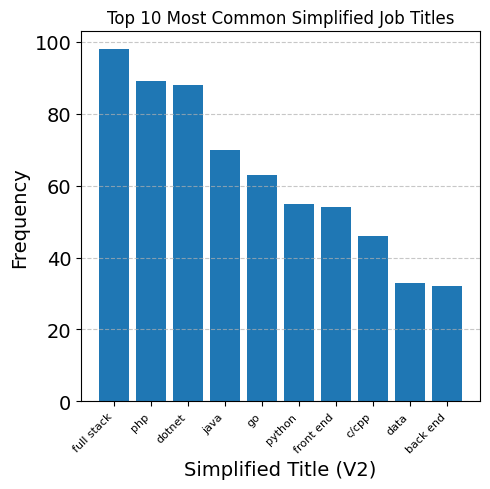


All Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):
simplified_title_reordered_v2
full stack              98
php                     89
dotnet                  88
java                    70
go                      63
python                  55
front end               54
c/cpp                   46
data                    33
back end                32
javascript              31
android                 27
devops                  24
sql                     24
wordpress               23
quality assurance       19
ios                     16
flutter                  6
graphic designer         5
kotlin                   5
project manager          3
security analyst         3
embedded                 2
business analyst         2
system                   2
architect                2
administrator            2
system administrator     2
unreal                   2
site reliability         2
technology officer       1
ruby                     1
d

In [64]:
# Cherry Pick with regex best words

# 1. Define dictionary with keyword / simplified titles you experienceect (priority matters implicitly by order)
JOB_KEYWORD_MAPPING_REORDERED_V2 = {
    # Programming Languages (Prioritized and ordered by perceived commonality/specificity)
    'python': r'python',
    'kotlin': r'kotlin',
    'java': r'java|full stack java|spring',
    'dotnet': r'\.net|dot[-\s]?net|net|asp\.net|aspdotdotnet|dotnetwork|dotdotnet|csharp/dotdotnet|aspdotdotnet dotdotnet|dotdotnet core|dotdotnet developers|c#|c[-\s]?sharp|csharp|asp\.net|dotdotnet',
    'javascript': r'node\.?js|nodejavascript|reactjs|react|react native|angularjs|angular|vue.javascript|vue.js', # Combining related JS frameworks
    'php': r'php symfony|php',
    'go': r'golang|go',
    'rust': r'rust',
    'swift': r'swift',
    'haskel': r'haskel|lisp',
    'ruby': r'ruby|rails', # Assuming Rails is specific to Ruby
    'c/cpp': r'c\+\+|c/cpp',
    'sql': r'sql|oracle|microsoft dynamics', # Databases related to programming

    # Mobile Development
    'ios': r'ios',
    'android': r'android',
    'flutter': r'flutter/dart|flutter',

    # Front-End and Back-End (Full Stack below)
    'front end': r'front[-\s]?end',
    'back end': r'back[-\s]?end|dotdotnet back end|back end nodejavascript',
    'full stack': r'full[-\s]?stack|full stack web|full stack web development|full stack development|arhitect full stack|dezvoltator full stack|full stack php|full stack dotdotnet',

    # Quality Assurance
    'quality assurance': r'qa|quality assurance|quality assurance analyst|automation quality assurance|quality assurance tester|tester',

    # Data Related
    'data': r'data analyst|data|data analyst data scientist|etl data tester|data steward',

    # DevOps and System Administration
    'devops': r'devops|azure devops|system devops',
    'system administrator': r'system administrator|linux dotnetwork administrator|system administrator helpdesk|web administrator',
    'linux administrator': r'linux',
    'monitoring operator': r'monitoring operator',
    'infrastructure support': r'infrastructure support',
    'system': r'system|linux dotnetwork system administrator',

    # Management/Leadership
    'project manager': r'project manager|software project manager',
    'product manager': r'product manager',
    'technology officer': r'technology officer',
    'delivery manager': r'delivery manager',
    'team lead': r'team lead', # Assuming this was a desired category (not in original, but often relevant)
    'architect': r'architect',

    # Analysis and Design
    'business analyst': r'business analyst|business analyst project coordinator',
    'ui ux designer': r'ui[/]?ux',
    'erp analyst': r'erp analyst',
    'market research analyst': r'market research analyst',
    'graphic designer': r'grafic designer|graphic designer|designer',
    'artist': r'artist',

    # Other Technical Roles
    'embedded': r'embedded|mcu',
    'unreal': r'unreal engine|unreal game |unrealdeveloper',
    'security analyst': r'security analyst',
    'cybersecurity': r'cybersecurity',
    'site reliability': r'site reliability',
    'mobile application': r'mobile application', # Keeping it here as it's a type of application
    'web': r'веб|веб-программист|web designer', # Broader web category
    'r&d': r'r&d',
    'wordpress': r'wordpress', # Could be web development, but often distinct
    'administrator': r'administrator', # Very general
        
    'UNKNOWN': 'other', # Default category if no keyword is found
}

def categorize_title_reordered_v2(title):
    """
    Passes through the job title and categorizes it based on the reordered
    predefined keywords with programming languages on top, full stack below
    front/back end, and iOS/Android higher.
    """
    if isinstance(title, str):
        processed_title = title.lower().strip()
        processed_title = re.sub(r'\([^)]*\)', '', processed_title).strip() # Remove parentheses content

        for category, pattern in JOB_KEYWORD_MAPPING_REORDERED_V2.items():
            if re.search(pattern, processed_title):
                return category
        return 'other'
    return 'other'

# Recalculate categorization
df['simplified_title_reordered_v2'] = df['title'].apply(categorize_title_reordered_v2)


# Get the value counts of the prioritized simplified titles (version 2)
simplified_title_counts_reordered_v2 = df['simplified_title_reordered_v2'].value_counts()

# remove other keyword
del simplified_title_counts_reordered_v2["other"]

top10_titles = simplified_title_counts_reordered_v2.head(10)

plt.figure(figsize=(5, 5))
plt.bar(top10_titles.index, top10_titles.values)
plt.title('Top 10 Most Common Simplified Job Titles')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Simplified Title (V2)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Display all prioritized simplified job title occurrences (version 2)
print("\nAll Simplified Job Title Occurrences (Programming Languages Top, iOS/Android Higher, Full Stack Lower):")
print(simplified_title_counts_reordered_v2)


In [65]:
import pandas as pd
from collections import defaultdict, Counter

def get_ngrams(text, n):
    """
    Generates a set of n-grams from the given text.

    Args:
        text (str): The input text.
        n (int): The length of the n-grams.

    Returns:
        set: A set of n-grams.  Returns an empty set if text is shorter than n.
    """
    if len(text) < n:
        return set()
    return set(text[i:i+n] for i in range(len(text) - n + 1))

def ngram_similarity(term1, term2, n=3):
    """
    Calculates the n-gram similarity between two terms.

    Args:
        term1 (str): The first term.
        term2 (str): The second term.
        n (int, optional): The length of the n-grams. Defaults to 3.

    Returns:
        float: The n-gram similarity (between 0 and 1). Returns 0 if both terms are empty.
    """
    ngrams1 = get_ngrams(term1, n)
    ngrams2 = get_ngrams(term2, n)
    intersection = ngrams1.intersection(ngrams2)
    union = ngrams1.union(ngrams2)
    return len(intersection) / len(union) if union else 0.0  # Handle empty case

def cluster_terms_by_ngram_similarity(df, column_name, similarity_threshold=0.15, n=3, b_print=False):
    """
    Clusters terms in a DataFrame column based on n-gram similarity, and prints the clusters.

    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 3.
    """
    # 1. Extract and flatten the list of terms, handling NaNs robustly
    all_things = [tech for tech_list in df[column_name].dropna() for tech in (tech_list if isinstance(tech_list, list) else [tech_list])]

    # 2. Count occurrences of each term
    counts = Counter(all_things)

    # 3. Initialize data structures for clustering
    clusters = defaultdict(list)
    terms = list(counts.keys())
    assigned = set()

    # 4. Perform the clustering
    for i, term1 in enumerate(terms):
        if i not in assigned:
            clusters[term1].append(term1)
            assigned.add(i)
            for j in range(i + 1, len(terms)):
                if j not in assigned:
                    similarity = ngram_similarity(term1, terms[j], n=n)
                    if similarity >= similarity_threshold:
                        clusters[term1].append(terms[j])
                        assigned.add(j)

    if b_print == True:
        # 5. Print the results
        print(f"Potential Clusters (N-gram, Threshold={similarity_threshold}, N={n}):")
        if not clusters:
            print("No clusters found.")  # Handle the case where no clusters are formed.
            return
    
        for key, value in clusters.items():
            if len(value) > 1:
                print(f"  {key}: {', '.join(value)}")
            
    return clusters #returning the clusters, in case the user wants to use them

In [66]:
def analyze_and_visualize_consolidated_terms(df, column_name, similarity_threshold=0.15, n=2, top_n=20, 
                                     figsize=(10, 5), rotation=45, show_details=True):
    """
    Analyzes, consolidates, and visualizes terms from a specified DataFrame column,
    grouping similar terms based on n-gram similarity.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the terms.
        column_name (str): The name of the column containing the terms (lists of strings).
        similarity_threshold (float, optional): The similarity threshold for clustering. Defaults to 0.15.
        n (int, optional): The length of the n-grams to use for comparison. Defaults to 2.
        top_n (int, optional): Number of top terms to visualize. Defaults to 20.
        figsize (tuple, optional): Figure size for the plot. Defaults to (10, 5).
        rotation (int, optional): Rotation angle for x-axis labels. Defaults to 45.
        show_details (bool, optional): Whether to print consolidation details. Defaults to True.
        
    Returns:
        tuple: (consolidated_counts, clusters) - Counter object with consolidated counts and clusters dictionary
    """
    import matplotlib.pyplot as plt
    from collections import Counter
    
    # Extract and flatten all terms from the specified column
    all_terms = [term for term_list in df[column_name].dropna() for term in 
                (term_list if isinstance(term_list, list) else [term_list])]
    
    # Count occurrences
    original_counts = Counter(all_terms)
    
    # Generate clusters
    clusters = cluster_terms_by_ngram_similarity(df, column_name, 
                                               similarity_threshold=similarity_threshold, n=n)
    
    # Create a mapping from each term to its cluster representative (the cluster key)
    term_to_cluster = {}
    for cluster_key, terms in clusters.items():
        for term in terms:
            term_to_cluster[term] = cluster_key
    
    # Consolidate counts based on clusters
    consolidated_counts = Counter()
    for term, count in original_counts.items():
        # If the term is in a cluster, add its count to the cluster key
        if term in term_to_cluster:
            consolidated_counts[term_to_cluster[term]] += count
        else:
            # If not in any cluster, keep it as is
            consolidated_counts[term] += count
    
    # Plot top N most common consolidated terms
    top_terms = dict(consolidated_counts.most_common(top_n))
    plt.figure(figsize=figsize)
    plt.bar(top_terms.keys(), top_terms.values())
    plt.title(f'Top {top_n} Most Common {column_name.capitalize()}')
    plt.xticks(rotation=rotation, ha='right')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    # Print full list sorted by frequency
    print(f"Full list of consolidated {column_name} term frequencies:\n")
    for term, count in consolidated_counts.most_common():
        print(f"{term:20} {count}")
    
    # Optionally, print which terms were consolidated
    if show_details:
        print("\nConsolidation details:")
        for cluster_key, terms in clusters.items():
            if len(terms) > 1:
                total_count = sum(original_counts[term] for term in terms)
                print(f"{cluster_key} ({total_count}): {', '.join(terms)}")
    
    return consolidated_counts, clusters

In [67]:
GENERIC_JOB_KEYWORD_MAPPING = {
    # Programming Roles
    'backend': r'\b(back[-\s]?end|node\.?js|golang|php|ruby|rails|python|java|dotnet|net|\.net|asp\.net|c#|c[-\s]?sharp|c\+\+|c/cpp)\b',
    'frontend': r'\b(front[-\s]?end|react(\.js)?|angular(\.js)?|vue(\.js)?|javascript|html|css)\b',
    'full stack': r'\bfull[-\s]?stack\b',
    
    # Mobile Development
    'mobile developer': r'\b(android|ios|flutter|react native|mobile application|kotlin)\b',

    # Data/Analytics
    'data': r'\b(data|data analyst|etl|data scientist|data steward|sql|oracle)\b',

    # Quality Assurance / Testing
    # 'qa tester': r'\b(qa|quality assurance|tester|automation)\b',

    # DevOps and Infrastructure
    'devops': r'\b(devops|azure devops|site reliability|infrastructure support)\b',
    # 'sysadmin': r'\b(system administrator|linux|web administrator|monitoring operator|administrator)\b',

    # UI/UX & Design
    # 'ui/ux designer': r'\b(ui[/]?[ ]?ux|designer|graphic designer|grafic designer)\b',

    # Management & Lead Roles
    # 'manager': r'\b(project manager|product manager|delivery manager|team lead|technology officer|architect)\b',

    # Analyst & Business Roles
    # 'analyst': r'\b(business analyst|market research analyst|erp analyst)\b',

    # Security
    # 'security': r'\b(security analyst|cybersecurity)\b',

    # Game
    'gamedev': r'\b(unity|unreal engine|unreal|godot)\b',

    # Web Development (broad)
    # 'web': r'\b(web|wordpress|веб|веб-программист)\b',

    # Research & Development
    # 'r&d': r'\br&d\b',

    # Fallback
    # 'other': r'.*',
}


In [68]:
def extract_generic_title(title, mapping):
    if not isinstance(title, str):
        return None
    for generic_title, pattern in mapping.items():
        if re.search(pattern, title, flags=re.IGNORECASE):
            return generic_title
    return None

df['generic_title'] = df['title'].apply(lambda x: extract_generic_title(x, GENERIC_JOB_KEYWORD_MAPPING))

In [69]:
import pandas as pd
from collections import Counter

filtered_df = df[df['generic_title'].notna()]

# Store counts per job title
tech_data = {}
soft_data = {}

for job in filtered_df['generic_title'].unique():
    subset = filtered_df[filtered_df['generic_title'] == job]
    
    # Tech skills counts
    tech_skills = [skill for skills_list in subset['hard_skills'].dropna() for skill in skills_list]
    tech_counts = Counter(tech_skills)
    tech_data[job] = tech_counts
    
    # Soft skills counts
    soft_skills = [skill for skills_list in subset['soft_skills'].dropna() for skill in skills_list]
    soft_counts = Counter(soft_skills)
    soft_data[job] = soft_counts

def build_ranked_df(skill_data, top_n=10):
    jobs = list(skill_data.keys())
    ranked_dict = {job: [] for job in jobs}
    
    # Build lists of top skills with counts as strings per job
    for job in jobs:
        top_skills = skill_data[job].most_common(top_n)
        ranked_dict[job] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings if less than top_n skills
        if len(ranked_dict[job]) < top_n:
            ranked_dict[job].extend([''] * (top_n - len(ranked_dict[job])))
    
    # Create DataFrame with ranks as index
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Create ranked DataFrames
tech_ranked_df = build_ranked_df(tech_data, top_n=25)
soft_ranked_df = build_ranked_df(soft_data, top_n=25)

# Hard and Soft Skills by job position

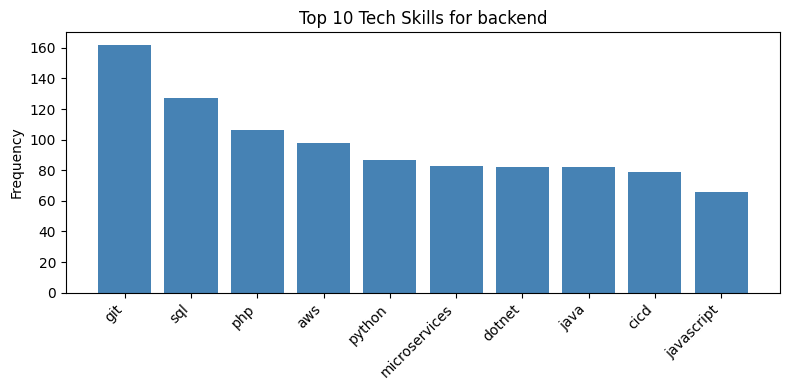

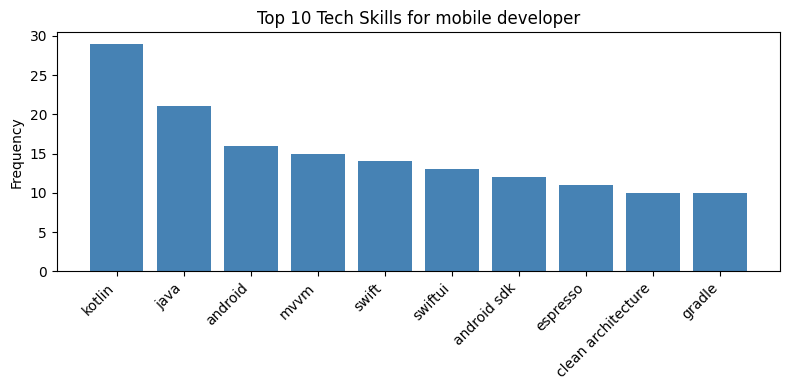

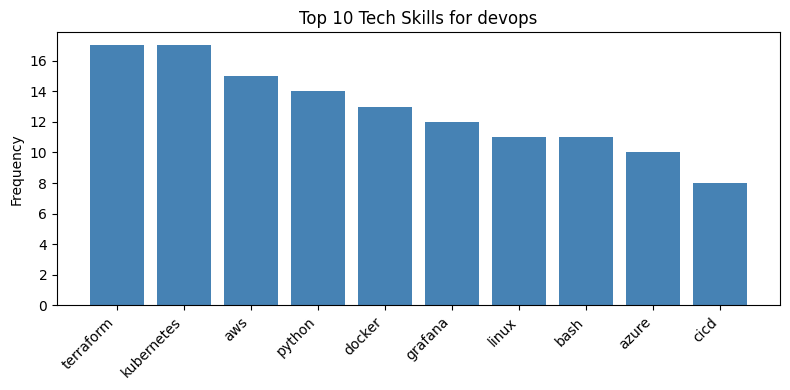

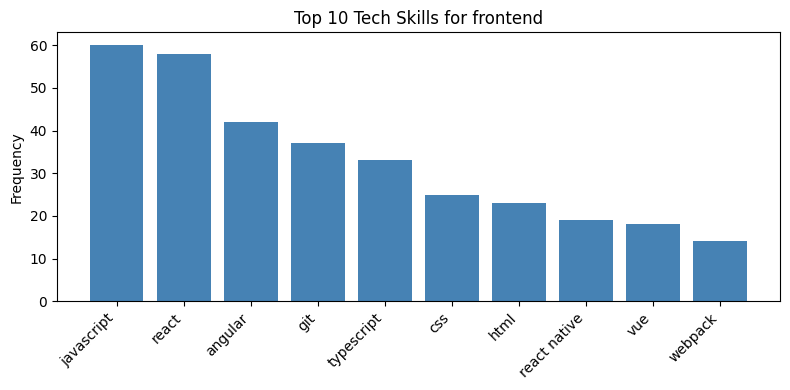

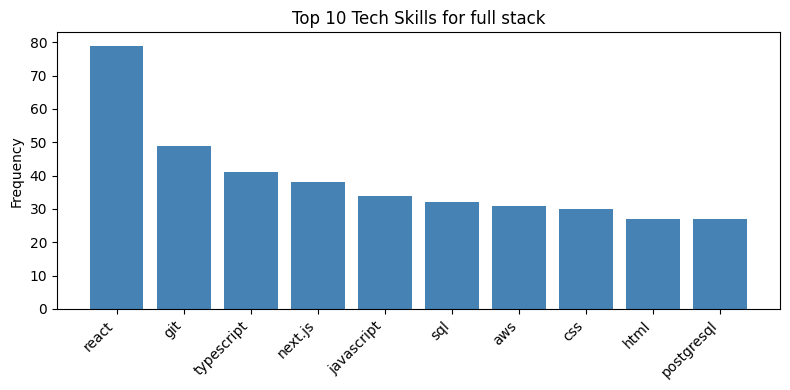

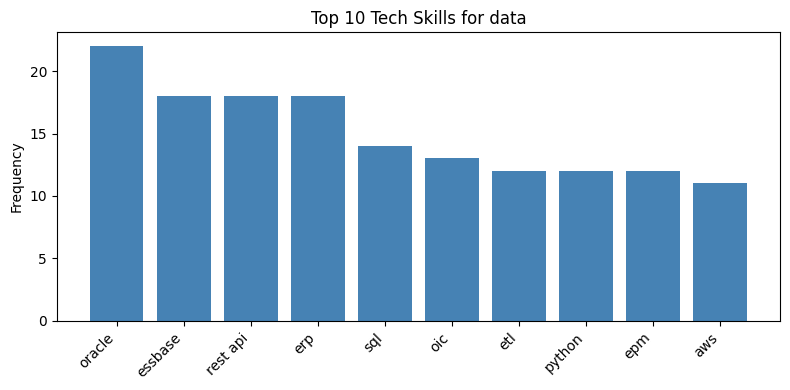

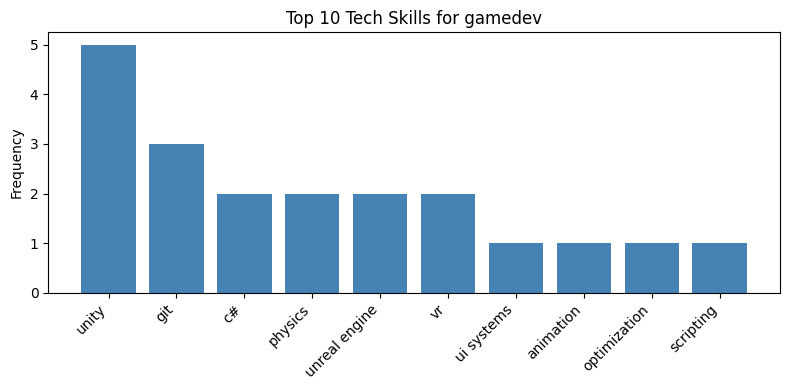

In [70]:
# Create DataFrame for tech skills counts
# Plot tech skills (top 10 per job)
for job in filtered_df['generic_title'].unique():
    tech_counts = tech_data[job].most_common(10)
    if tech_counts:
        skills, counts = zip(*tech_counts)
        plt.figure(figsize=(8, 4))
        plt.bar(skills, counts, color='steelblue')
        plt.title(f'Top 10 Tech Skills for {job}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot soft skills (top 10 per job)
# for job in filtered_df['generic_title'].unique():
#     soft_counts = soft_data[job].most_common(10)
#     if soft_counts:
#         skills, counts = zip(*soft_counts)
#         plt.figure(figsize=(8, 4))
#         plt.bar(skills, counts, color='indianred')
#         plt.title(f'Top 10 Soft Skills for {job}')
#         plt.xticks(rotation=45, ha='right')
#         plt.ylabel('Frequency')
#         plt.tight_layout()
#         plt.show()


## Hard skills table

In [71]:
# Display
# print("\n=== Top 25 Tech Skills per Job ===")
display(tech_ranked_df)

backend         mobile developer              devops  \
Rank 1            git (162)              kotlin (29)      terraform (17)   
Rank 2            sql (127)                java (21)     kubernetes (17)   
Rank 3            php (106)             android (16)            aws (15)   
Rank 4             aws (98)                mvvm (15)         python (14)   
Rank 5          python (87)               swift (14)         docker (13)   
Rank 6   microservices (83)             swiftui (13)        grafana (12)   
Rank 7          dotnet (82)         android sdk (12)          linux (11)   
Rank 8            java (82)            espresso (11)           bash (11)   
Rank 9            cicd (79)  clean architecture (10)          azure (10)   
Rank 10     javascript (66)              gradle (10)            cicd (8)   
Rank 11         docker (65)               junit (10)         ansible (8)   
Rank 12          mysql (59)                  ios (8)      prometheus (8)   
Rank 13        laravel (57)      jetpack compose (7)             elk (6)   
Rank 14          azure (51)              flutter (6)         jenkins (5)   
Rank 15         golang (48)                agile (6)  cloudformation (4)   
Rank 16     postgresql (48)                 cicd (6)      powershell (4)   
Rank 17        symfony (47)                  aws (5)         windows (4)   
Rank 18          kafka (42)                react (5)          splunk (4)   
Rank 19          linux (40)           kubernetes (5)      postgresql (3)   
Rank 20          react (37)            terraform (5)             eks (3)   
Rank 21  elasticsearch (36)                scrum (5)       gitlab ci (3)   
Rank 22         spring (32)                  git (4)   elasticsearch (2)   
Rank 23        mongodb (31)           websockets (4)           mysql (2)   
Rank 24            gcp (31)                 http (4)           kafka (2)   
Rank 25         csharp (30)               docker (4)      clickhouse (2)   

                  frontend       full stack                     data  \
Rank 1     javascript (60)       react (79)              oracle (22)   
Rank 2          react (58)         git (49)             essbase (18)   
Rank 3        angular (42)  typescript (41)            rest api (18)   
Rank 4            git (37)     next.js (38)                 erp (18)   
Rank 5     typescript (33)  javascript (34)                 sql (14)   
Rank 6            css (25)         sql (32)                 oic (13)   
Rank 7           html (23)         aws (31)                 etl (12)   
Rank 8   react native (19)         css (30)              python (12)   
Rank 9            vue (18)        html (27)                 epm (12)   
Rank 10       webpack (14)  postgresql (27)                 aws (11)   
Rank 11      rest api (14)     nest.js (24)    microsoft office (11)   
Rank 12        docker (11)       mysql (23)           smartview (10)   
Rank 13         html5 (11)      nodejs (21)      microsoft excel (9)   
Rank 14  restful apis (11)      docker (21)                 pbcs (9)   
Rank 15       node.js (11)     mongodb (20)                 cicd (6)   
Rank 16     socket.io (11)   terraform (15)        data modeling (5)   
Rank 17          css3 (10)        cicd (15)     data warehousing (5)   
Rank 18           vite (9)      dotnet (14)                spark (5)   
Rank 19         vue.js (9)    tailwind (14)             power bi (5)   
Rank 20          redux (8)          c# (13)              tableau (5)   
Rank 21           sass (8)  sql server (13)                kafka (4)   
Rank 22           rest (8)     node.js (13)           postgresql (4)   
Rank 23         nodejs (8)     graphql (13)         aws redshift (4)   
Rank 24   google cloud (8)      nextjs (11)               docker (4)   
Rank 25           java (8)         gcp (11)  metadata management (3)   

                       gamedev  
Rank 1               unity (5)  
Rank 2                 git (3)  
Rank 3                  c# (2)  
Rank 4             physics (2)  
Rank 

## Soft skills table

In [72]:
# print("\n=== Top 25 Soft Skills per Job ===")
# display(soft_ranked_df)

## Job positions open

/tmp/ipykernel_56406/1874332190.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(job_date_counts))


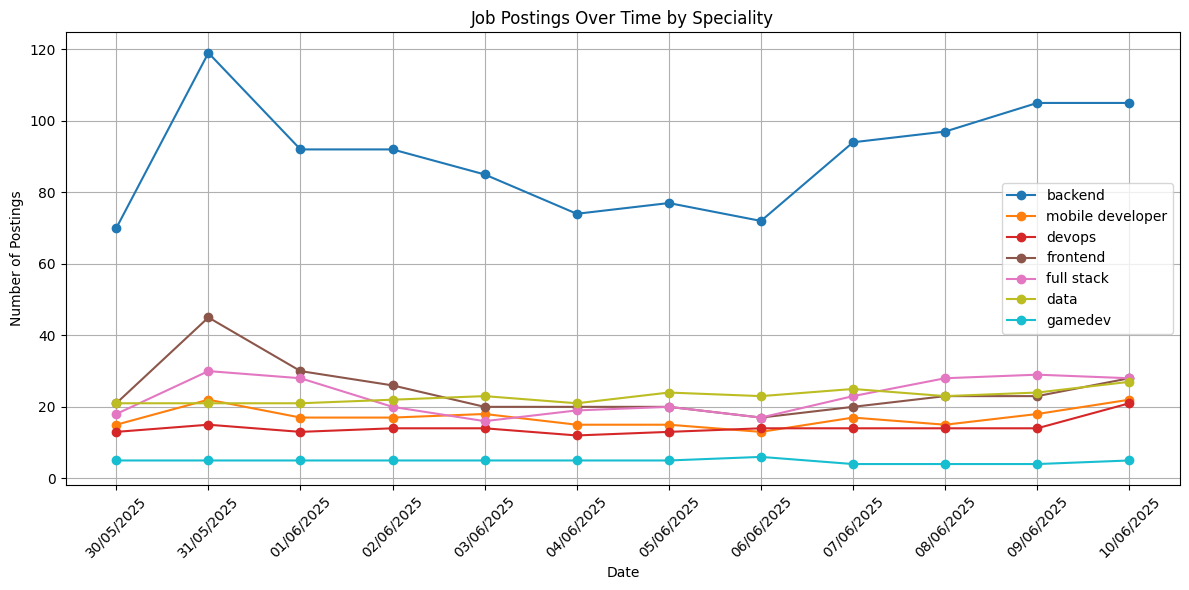

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
from utils import parse_date

# Prepare dictionary: {job_title: Counter({date: count})}
job_date_counts = defaultdict(Counter)

# Iterate through rows to populate job_date_counts
for _, row in filtered_df.iterrows():
    job = row['generic_title']
    occurrences = row['occurrences']
    if not occurrences:
        continue
    if isinstance(occurrences, str):
        occurrences = [occurrences]
    for date_str in occurrences:
        date = parse_date(date_str)
        if date:
            job_date_counts[job][date] += 1

# Plot
plt.figure(figsize=(12, 6))

# Choose distinct colors automatically
colors = plt.cm.get_cmap('tab10', len(job_date_counts))

for i, (job, date_counter) in enumerate(job_date_counts.items()):
    sorted_dates = sorted(date_counter.items())
    if not sorted_dates:
        continue
    dates, counts = zip(*sorted_dates)
    plt.plot(dates, counts, label=job, color=colors(i), marker='o')

# Formatting
plt.title("Job Postings Over Time by Speciality")
plt.xlabel("Date")
plt.ylabel("Number of Postings")
plt.grid(True)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Most common occurences of keywords

## Responsabilities

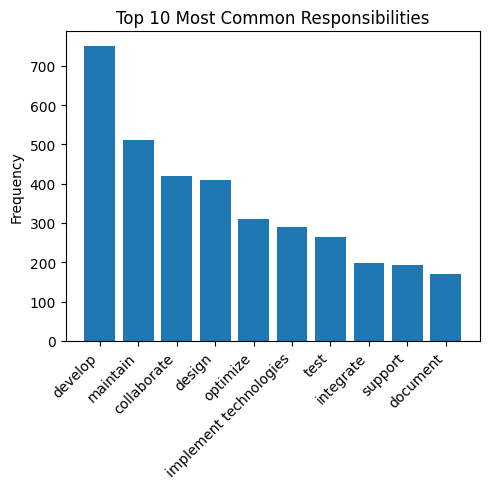

Full list of consolidated responsibilities term frequencies:

develop              750
maintain             510
collaborate          420
design               410
optimize             311
implement technologies 289
test                 263
integrate            197
support              194
document             170
debug                124
review               120
deploy               111
improve              111
manage               99
troubleshoot         96
analyze              82
monitor              75
build                68
deliver              63
ensure               61
create test cases    57
mentor               51
resolve              48
generate             44
research             43
scale                42
lead                 40
write                36
plan                 34
participate          32
define               32
train                29
share                29
correct responses    29
code                 28
recommend            27
configure            25
work      

In [74]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'responsibilities', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Hard Skills

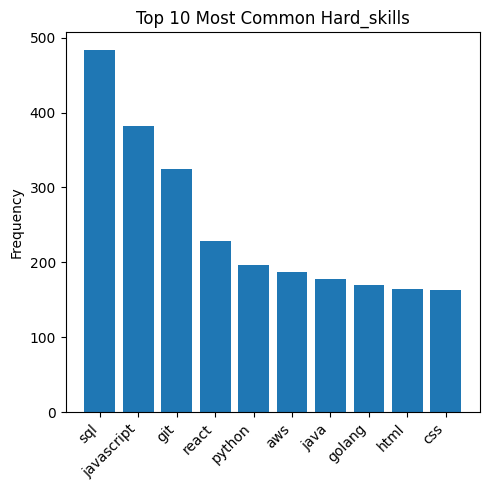

Full list of consolidated hard_skills term frequencies:

sql                  483
javascript           382
git                  324
react                229
python               196
aws                  187
java                 178
golang               170
html                 164
css                  163
web services         148
rest                 147
php                  145
docker               144
dotnet               136
cicd                 136
postgresql           118
linux                113
azure                87
c++                  80
kubernetes           76
android              75
mongodb              69
oracle               69
spring boot          68
nestjs               67
nodejs               66
sql server           65
kafka                64
laravel              63
nagios               58
cypress              57
microsoft office     56
kotlin               53
vue                  52
terraform            51
oop                  49
ai                   49
symfony      

In [75]:
tech_counts, tech_clusters = analyze_and_visualize_consolidated_terms(df, 'hard_skills', similarity_threshold=0.34, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Soft Skills

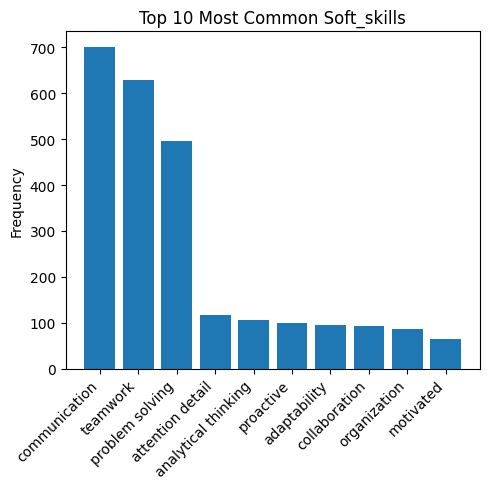

Full list of consolidated soft_skills term frequencies:

communication        700
teamwork             629
problem solving      495
attention detail     116
analytical thinking  106
proactive            100
adaptability         94
collaboration        93
organization         87
motivated            64
leadership           60
learning             53
responsibility       38
independence         31
detail oriented      29
initiative           24
fast learner         24
time management      21
interpersonal        20
creativity           18
results-focused      16
curiosity            16
documentation        12
flexibility          11
mentorship           11
growth mindset       11
planning             9
flexible thinking    9
multitasking         8
research             6
strategic thinking   6
ambition             5
negotiation          5
results-oriented     5
patience             5
teaching             4
agile development    3
autonomous           3
customer oriented    3
innovation    

In [76]:
soft_counts, soft_clusters = analyze_and_visualize_consolidated_terms(df, 'soft_skills', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Benefits

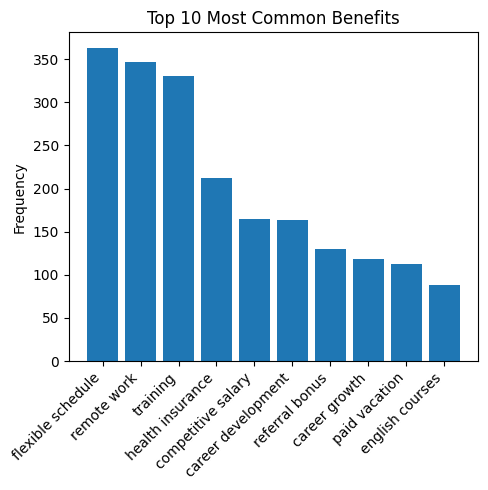

Full list of consolidated benefits term frequencies:

flexible schedule    363
remote work          347
training             330
health insurance     212
competitive salary   165
career development   164
referral bonus       130
career growth        118
paid vacation        113
english courses      88
hybrid work          73
professional growth  71
language classes     70
corporate gifts      55
team building        53
transport            50
sick leave           48
growth opportunities 48
unlimited pto        46
paid lunch           45
social package       44
paid holidays        40
sports compensation  33
education bonuses    32
company perks        32
maternity leave      30
comprehensive benefits 29
work-life balance    27
fitness discounts    24
medical coverage     24
childcare budget     24
travel               24
medical reimbursement 23
performance bonus    23
continuous learning  23
modern office        22
psychological support 22
meal tickets         21
gym                  

In [77]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'benefits', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Languages

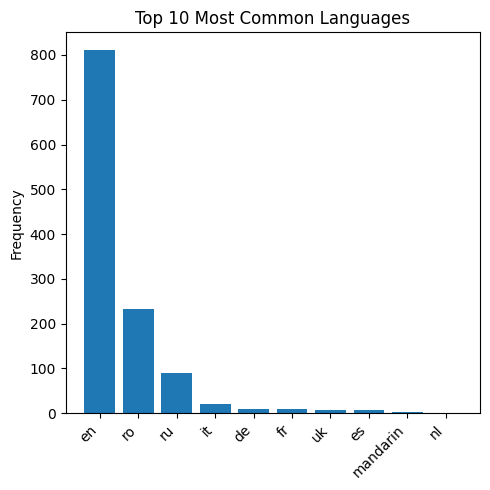

Full list of consolidated languages term frequencies:

en                   810
ro                   233
ru                   89
it                   21
de                   10
fr                   9
uk                   6
es                   6
mandarin             3
nl                   1

Consolidation details:


In [78]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'languages', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Education

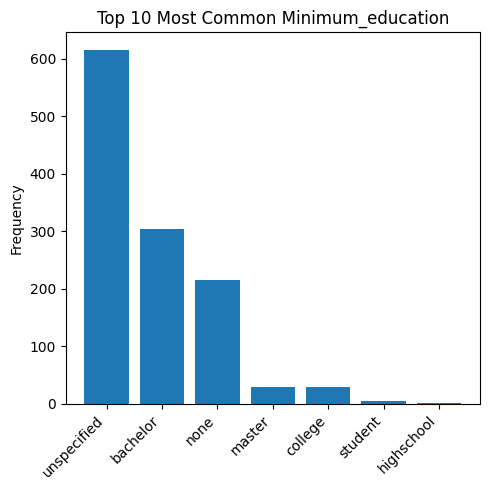

Full list of consolidated minimum_education term frequencies:

unspecified          615
bachelor             304
none                 215
master               30
college              29
student              5
highschool           2

Consolidation details:


In [79]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'minimum_education', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

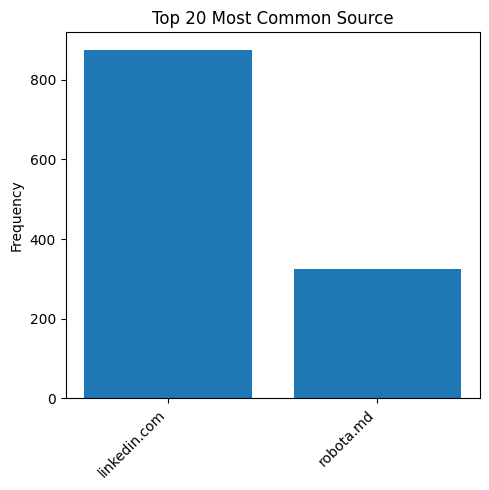

Full list of consolidated source term frequencies:

linkedin.com         876
robota.md            324

Consolidation details:


In [80]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'source', similarity_threshold=0.5, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Company Name

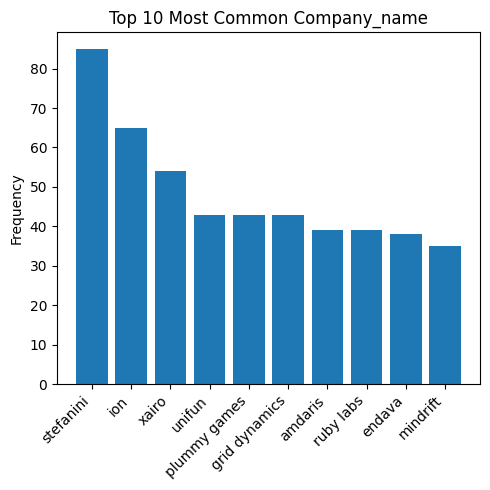

Full list of consolidated company_name term frequencies:

stefanini            85
ion                  65
xairo                54
unifun               43
plummy games         43
grid dynamics        43
amdaris              39
ruby labs            39
endava               38
mindrift             35
fusionworks          28
idt corporation      24
insomniac design     21
mixbook              20
gilat satellite networks 20
infuse               18
bairesdev            17
threecolts           17
kivork               16
gr8 tech             14
orange systems       14
appsfactory          12
confidential co.     12
starnet              12
micro1               11
capslock             11
adtelligent          10
coherent solutions   10
us software solutions 10
backstageit          9
hr consulting        9
orange moldova       8
nextapp              8
loleworks            8
ebs integrator       7
s&t mold             7
dyninno              7
maib                 7
extole               7
braintrust 

In [81]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_name', similarity_threshold=0.5, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

## Company Size

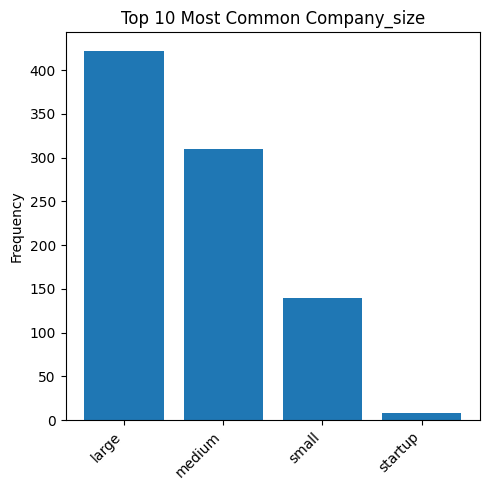

Full list of consolidated company_size term frequencies:

large                422
medium               310
small                140
startup              8

Consolidation details:


In [82]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'company_size', similarity_threshold=0.4, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

### Company Size Skills Required

In [83]:
import pandas as pd
from collections import Counter

# Filter rows where company_size is available
filtered_df = df[df['company_size'].notna()]

# Store counts per company size
skill_data = {}

for size in filtered_df['company_size'].unique():
    subset = filtered_df[filtered_df['company_size'] == size]
    
    skills = [skill for skills_list in subset['hard_skills'].dropna() 
              for skill in (skills_list if isinstance(skills_list, list) else [skills_list])]
    
    skill_counts = Counter(skills)
    skill_data[size] = skill_counts

# Build ranked table: rows = Rank 1..N, columns = company sizes
def build_ranked_df(skill_data, top_n=10):
    sizes = list(skill_data.keys())
    ranked_dict = {size: [] for size in sizes}
    
    for size in sizes:
        top_skills = skill_data[size].most_common(top_n)
        ranked_dict[size] = [f"{skill} ({count})" for skill, count in top_skills]
        
        # Pad with empty strings
        if len(ranked_dict[size]) < top_n:
            ranked_dict[size].extend([''] * (top_n - len(ranked_dict[size])))
    
    ranked_df = pd.DataFrame(ranked_dict, index=[f"Rank {i+1}" for i in range(top_n)])
    return ranked_df

# Generate and show the ranked DataFrame
hard_skills_ranked_df = build_ranked_df(skill_data, top_n=15)
hard_skills_ranked_df


large              medium               startup  \
Rank 1         sql (134)            sql (93)         wordpress (4)   
Rank 2      python (109)            git (93)               git (4)   
Rank 3         git (104)          react (50)            python (3)   
Rank 4        java (100)     postgresql (49)             pyqt5 (3)   
Rank 5         cicd (97)        android (48)             pyqt6 (3)   
Rank 6   javascript (96)          linux (47)           tkinter (3)   
Rank 7          aws (93)            c++ (47)            pandas (3)   
Rank 8       dotnet (91)            ios (47)          openpyxl (3)   
Rank 9       docker (61)         docker (46)                1c (3)   
Rank 10  sql server (60)           java (46)       com interop (3)   
Rank 11       azure (56)            aws (42)              html (2)   
Rank 12       react (56)  microservices (41)               css (2)   
Rank 13       mysql (54)     typescript (40)               php (2)   
Rank 14      oracle (51)     javascript (36)          frontend (1)   
Rank 15        html (51)      debugging (36)  website building (1)   

                      small  
Rank 1      javascript (74)  
Rank 2           react (66)  
Rank 3             git (59)  
Rank 4             php (48)  
Rank 5         laravel (39)  
Rank 6        rest api (33)  
Rank 7         angular (31)  
Rank 8      typescript (30)  
Rank 9           mysql (29)  
Rank 10            aws (28)  
Rank 11            sql (21)  
Rank 12  microservices (20)  
Rank 13        symfony (19)  
Rank 14         python (18)  
Rank 15           saas (18)

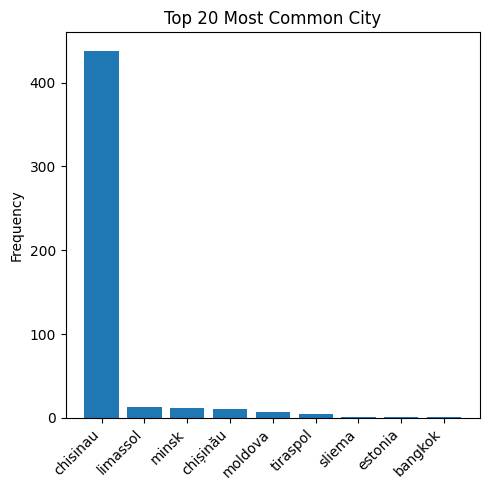

Full list of consolidated city term frequencies:

chisinau             438
limassol             13
minsk                12
chișinău             10
moldova              7
tiraspol             5
sliema               1
estonia              1
bangkok              1

Consolidation details:


In [84]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'city', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

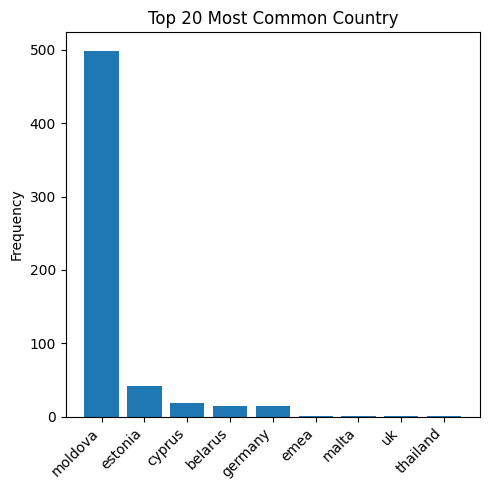

Full list of consolidated country term frequencies:

moldova              499
estonia              42
cyprus               19
belarus              15
germany              14
emea                 1
malta                1
uk                   1
thailand             1

Consolidation details:


In [85]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'country', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

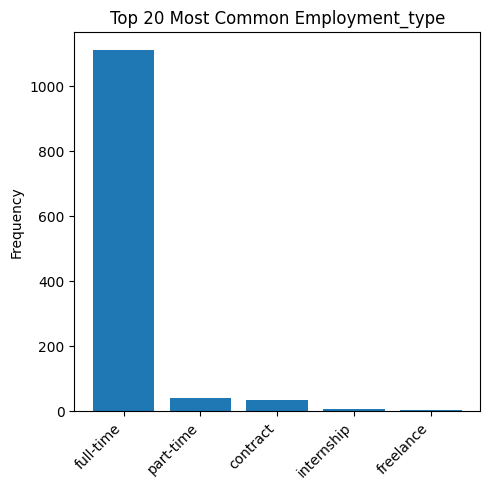

Full list of consolidated employment_type term frequencies:

full-time            1111
part-time            41
contract             36
internship           6
freelance            3

Consolidation details:


In [86]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'employment_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

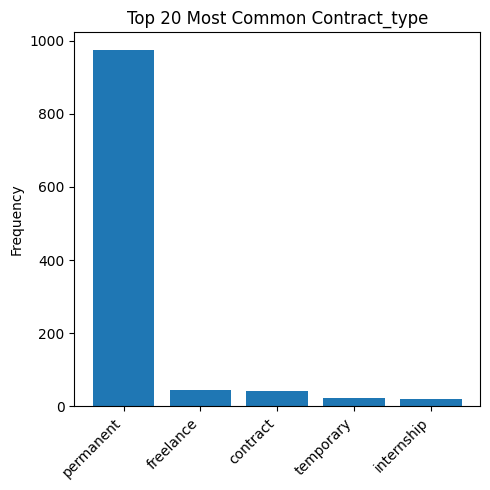

Full list of consolidated contract_type term frequencies:

permanent            975
freelance            45
contract             42
temporary            22
internship           21

Consolidation details:


In [87]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'contract_type', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Work Schedule

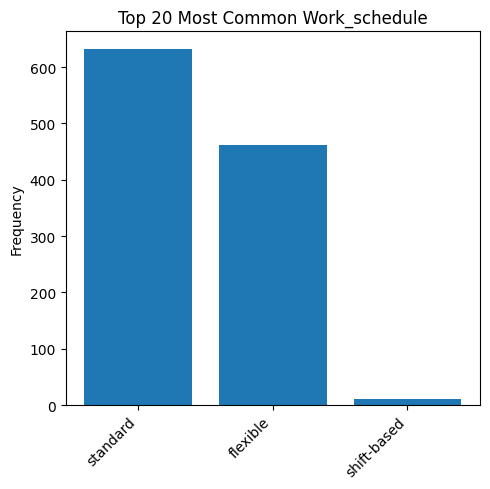

Full list of consolidated work_schedule term frequencies:

standard             632
flexible             462
shift-based          11

Consolidation details:


In [88]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'work_schedule', similarity_threshold=0.4, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Remote Work

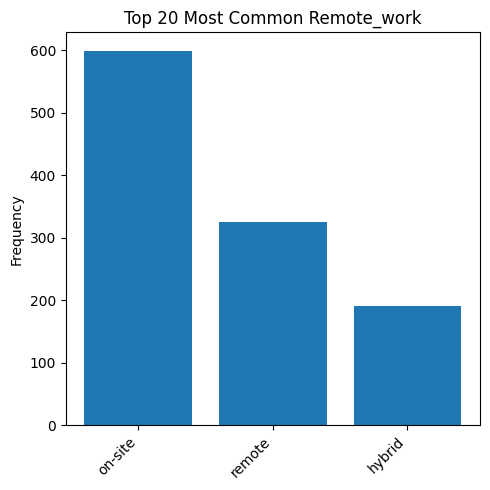

Full list of consolidated remote_work term frequencies:

on-site              599
remote               325
hybrid               190

Consolidation details:


In [89]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'remote_work', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

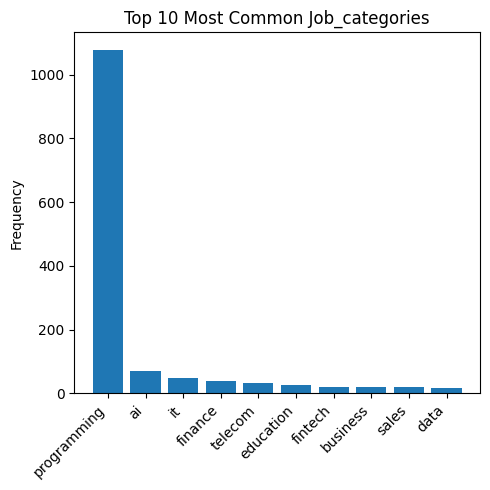

Full list of consolidated job_categories term frequencies:

programming          1079
ai                   69
it                   48
finance              38
telecom              33
education            28
fintech              21
business             20
sales                20
data                 18
video editing        18
networking           17
e-learning           16
it support           15
banking              15
management           13
system administration 10
web development      10
automotive           10
cyber security       9
testing              8
cloud                7
qa                   6
engineering          6
technology           6
gamedev              5
travel               5
hr                   5
analysis             4
design               4
ecommerce            4
real estate          4
renewable energy     4
human resources      3
it services          3
data analytics       3
consulting           3
construction         2
accounting           2
hospitality          

In [90]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'job_categories', similarity_threshold=0.3, n=2, top_n=10, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Salary Currency

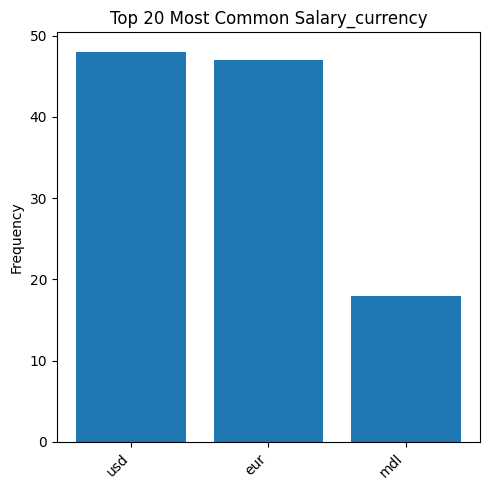

Full list of consolidated salary_currency term frequencies:

usd                  48
eur                  47
mdl                  18

Consolidation details:


In [91]:
benefits_counts, benefits_clusters = analyze_and_visualize_consolidated_terms(df, 'salary_currency', similarity_threshold=0.3, n=2, top_n=20, 
                                     figsize=(5, 5), rotation=45, show_details=True)

# Experience Distribution

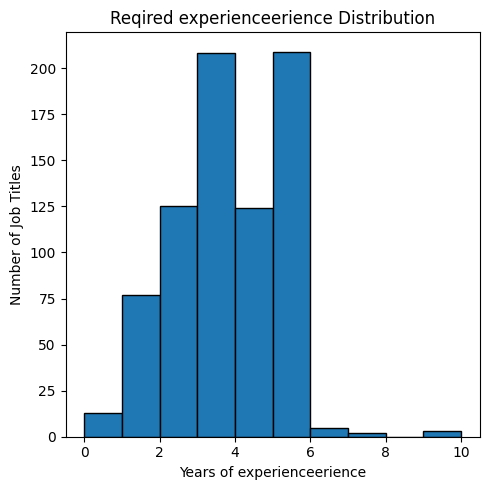

experienceerience Stats (After Dropping NaN):

count    766.000000
mean       3.349869
std        1.464274
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: experience, dtype: float64


In [92]:
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df_clean = df.dropna(subset=['experience'])

# Plot experienceerience distribution
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(df_clean['experience'], bins=range(int(df_clean['experience'].min()), int(df_clean['experience'].max()) + 1), edgecolor='black')
ax.set_title('Reqired experienceerience Distribution')
ax.set_xlabel('Years of experienceerience')
ax.set_ylabel('Number of Job Titles')
plt.tight_layout()
plt.show()

# Print experienceerience stats for cleaned data
print("experienceerience Stats (After Dropping NaN):\n")
print(df_clean['experience'].describe())


# Salary distribution

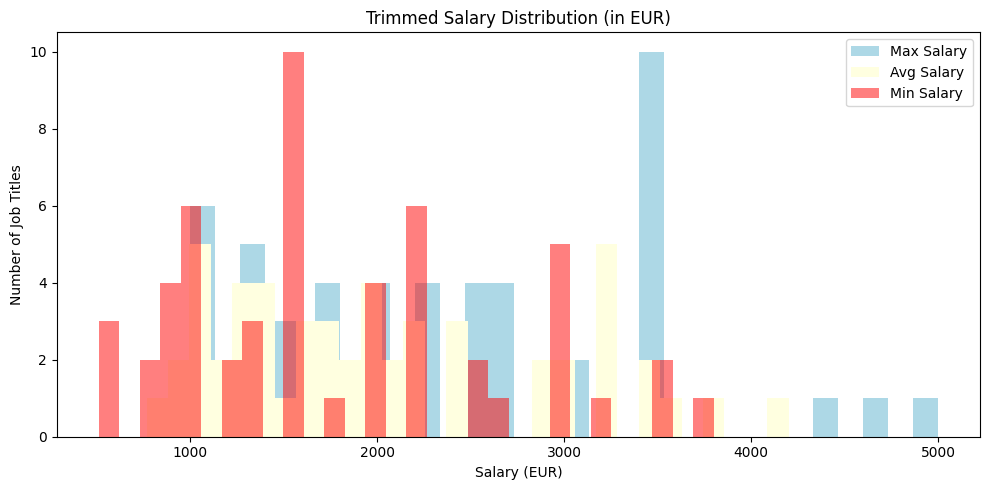

Salary Stats (on 53 salaries) (in EUR, After Conversion & Trimming):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       53.000000       53.000000       53.000000
mean      1778.594340     2048.132075     2317.669811
std        850.936673      891.189768     1018.722762
min        510.000000      765.000000     1000.000000
25%       1020.000000     1320.000000     1500.000000
50%       1584.000000     1900.000000     2200.000000
75%       2200.000000     2860.000000     3080.000000
max       3800.000000     4200.000000     5000.000000


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is already loaded

# Conversion rates to EUR
currency_rates = {
    'usd': 0.88,
    'mdl': 0.051,
    'eur': 1.0,
    'gbp': 1.17
}

# Function to convert salary to EUR
def convert_to_eur(row):
    currency = (row.get('salary_currency') or '').lower()
    rate = currency_rates.get(currency)
    
    if rate and pd.notnull(row.get('min_salary')):
        min_salary_eur = row['min_salary'] * rate
        max_salary = row.get('max_salary')
        max_salary_eur = max_salary * rate if pd.notnull(max_salary) else None
    else:
        min_salary_eur = max_salary_eur = None
    
    return pd.Series([min_salary_eur, max_salary_eur])

# Convert salaries to EUR
df[['salary_min_eur', 'salary_max_eur']] = df.apply(convert_to_eur, axis=1)
df_clean = df.dropna(subset=['salary_min_eur', 'salary_max_eur']).copy()
df_clean['salary_avg_eur'] = (df_clean['salary_min_eur'] + df_clean['salary_max_eur']) / 2

# Sort and trim top/bottom 3 in each salary column
def trim_outliers(df, column, n=3, m=3):
    return df.sort_values(by=column).iloc[n:-m]

df_trimmed = df_clean.copy()
for col in ['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']:
    df_trimmed = trim_outliers(df_trimmed, col, 3, 6)

# Plot salary distributions (trimmed)
plt.figure(figsize=(10, 5))
plt.hist(df_trimmed['salary_max_eur'], bins=30, alpha=1, label='Max Salary', color='lightblue')
plt.hist(df_trimmed['salary_avg_eur'], bins=30, alpha=1, label='Avg Salary', color='lightyellow')
plt.hist(df_trimmed['salary_min_eur'], bins=30, alpha=0.5, label='Min Salary', color='red')
plt.title('Trimmed Salary Distribution (in EUR)')
plt.xlabel('Salary (EUR)')
plt.ylabel('Number of Job Titles')
plt.legend()
plt.tight_layout()
plt.show()

# Print salary stats (trimmed)
print(f"Salary Stats (on {len(df_trimmed)} salaries) (in EUR, After Conversion & Trimming):\n")
print(df_trimmed[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe())


## Salary per specialization

In [94]:
df_clean_salaries = df_trimmed.copy()
filtered_df = df_clean_salaries[df_clean_salaries['generic_title'].notna()].copy()

# Analysis by job specialty
job_specialties = filtered_df['generic_title'].value_counts()
print("Job Specialties Distribution:")
for specialty, count in job_specialties.items():
    print(f"{specialty}: {count} positions")
print("\n" + "="*80 + "\n")

# Create salary analysis for each specialty with sufficient data (at least 3 positions)
min_positions = 3
specialties_with_data = job_specialties[job_specialties >= min_positions].index

# Calculate stats for each specialty
specialty_stats = {}
for specialty in specialties_with_data:
    specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
    specialty_stats[specialty] = specialty_data[['salary_min_eur', 'salary_avg_eur', 'salary_max_eur']].describe()

# Print detailed stats for each specialty
for specialty in specialties_with_data:
    specialty_data = filtered_df[filtered_df['generic_title'] == specialty]
    count = len(specialty_data)
    
    print(f"{specialty.upper()} Salary Stats (on {count} salaries)(in EUR, After Conversion):\n")
    print(specialty_stats[specialty])
    print("\n" + "-"*60 + "\n")

# Summary table of all specialties
print("SALARY SUMMARY BY JOB SPECIALTY (in EUR):")
print("="*80)

summary_data = []
for specialty in df_clean_salaries['generic_title'].unique():
    specialty_data = df_clean_salaries[df_clean_salaries['generic_title'] == specialty]
    if len(specialty_data) > 0:
        summary_data.append({
            'Specialty': specialty,
            'Count': len(specialty_data),
            'Min Salary (Avg)': round(specialty_data['salary_min_eur'].mean(), 0),
            'Avg Salary (Avg)': round(specialty_data['salary_avg_eur'].mean(), 0),
            'Max Salary (Avg)': round(specialty_data['salary_max_eur'].mean(), 0),
            'Median Avg Salary': round(specialty_data['salary_avg_eur'].median(), 0)
        })

summary_df = pd.DataFrame(summary_data).sort_values('Avg Salary (Avg)', ascending=False)
print(summary_df.to_string(index=False))

Job Specialties Distribution:
backend: 26 positions
full stack: 3 positions
mobile developer: 3 positions
frontend: 2 positions
gamedev: 2 positions
data: 1 positions
devops: 1 positions


BACKEND Salary Stats (on 26 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count       26.000000       26.000000       26.000000
mean      2213.288462     2538.134615     2862.980769
std        922.254262     1070.509211     1313.979623
min        918.000000      994.500000     1071.000000
25%       1584.000000     1811.750000     2200.000000
50%       2200.000000     2310.000000     2620.000000
75%       3000.000000     3250.000000     3500.000000
max       4500.000000     5750.000000     7000.000000

------------------------------------------------------------

FULL STACK Salary Stats (on 3 salaries)(in EUR, After Conversion):

       salary_min_eur  salary_avg_eur  salary_max_eur
count         3.00000        3.000000        3.000000
mean       2376.0000

# Correlations
## Experience and salary

Correlation between Experience and Minimum Salary (EUR):
                experience  salary_min_eur
experience        1.000000        0.612547
salary_min_eur    0.612547        1.000000

Correlation between Experience and Maximum Salary (EUR):
                experience  salary_max_eur
experience        1.000000        0.613481
salary_max_eur    0.613481        1.000000


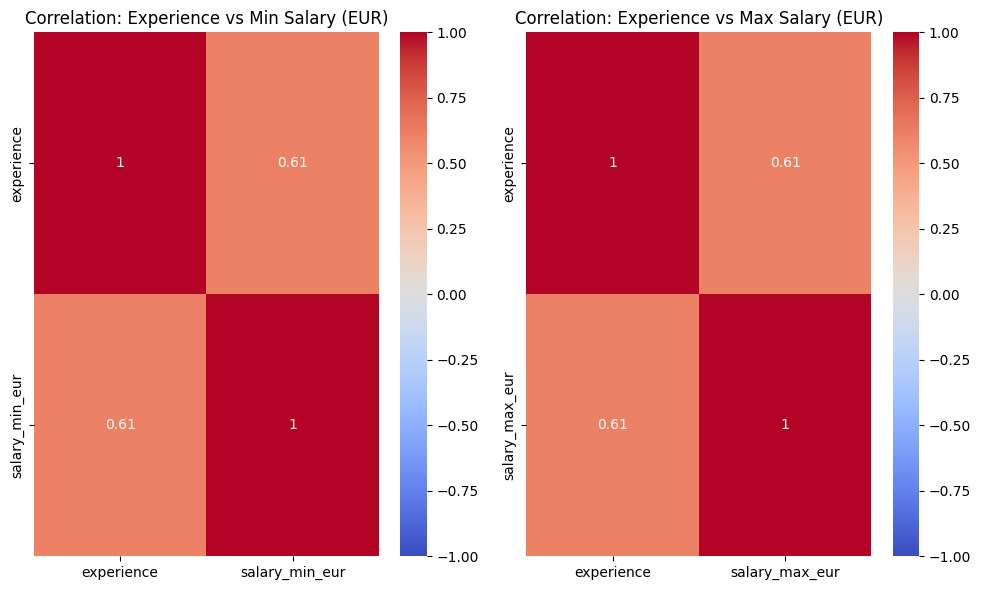

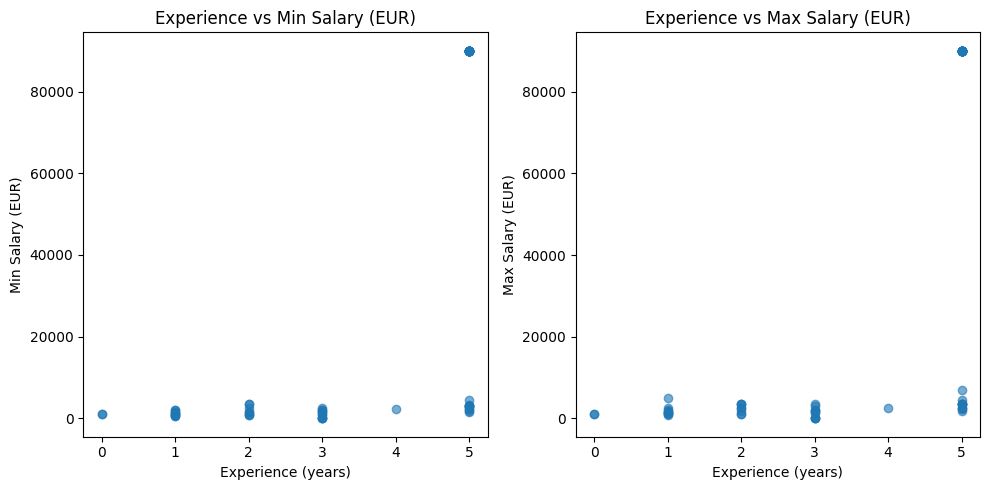

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where experience or salary (min or max) is missing
df_clean_corr = df.dropna(subset=['experience', 'salary_min_eur', 'salary_max_eur'])

# Compute correlation between experience and salaries
correlation_min = df_clean_corr[['experience', 'salary_min_eur']].corr()
correlation_max = df_clean_corr[['experience', 'salary_max_eur']].corr()

# Display correlation matrices
print("Correlation between Experience and Minimum Salary (EUR):")
print(correlation_min)
print("\nCorrelation between Experience and Maximum Salary (EUR):")
print(correlation_max)

# Plot heatmaps of the correlation matrices
plt.figure(figsize=(10, 6))

# Heatmap: Experience vs Min Salary
plt.subplot(1, 2, 1)
sns.heatmap(correlation_min, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Min Salary (EUR)")

# Heatmap: Experience vs Max Salary
plt.subplot(1, 2, 2)
sns.heatmap(correlation_max, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Experience vs Max Salary (EUR)")

plt.tight_layout()
plt.show()

# Scatter plots for visual inspection
plt.figure(figsize=(10, 5))

# Scatter plot: Experience vs Min Salary
plt.subplot(1, 2, 1)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_min_eur'], alpha=0.6)
plt.title("Experience vs Min Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Min Salary (EUR)')

# Scatter plot: Experience vs Max Salary
plt.subplot(1, 2, 2)
plt.scatter(df_clean_corr['experience'], df_clean_corr['salary_max_eur'], alpha=0.6)
plt.title("Experience vs Max Salary (EUR)")
plt.xlabel('Experience (years)')
plt.ylabel('Max Salary (EUR)')

plt.tight_layout()
plt.show()

## Salary and number of skills

Correlation Matrix (Average Salary vs Number of Skills):

                 salary_avg_eur  num_hard_skills  num_soft_skills
salary_avg_eur         1.000000         0.447432        -0.034285
num_hard_skills        0.447432         1.000000         0.537637
num_soft_skills       -0.034285         0.537637         1.000000


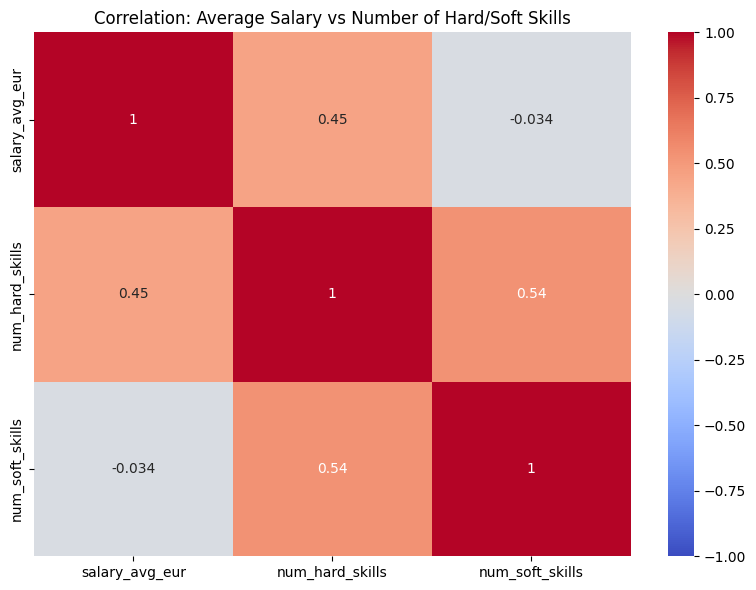

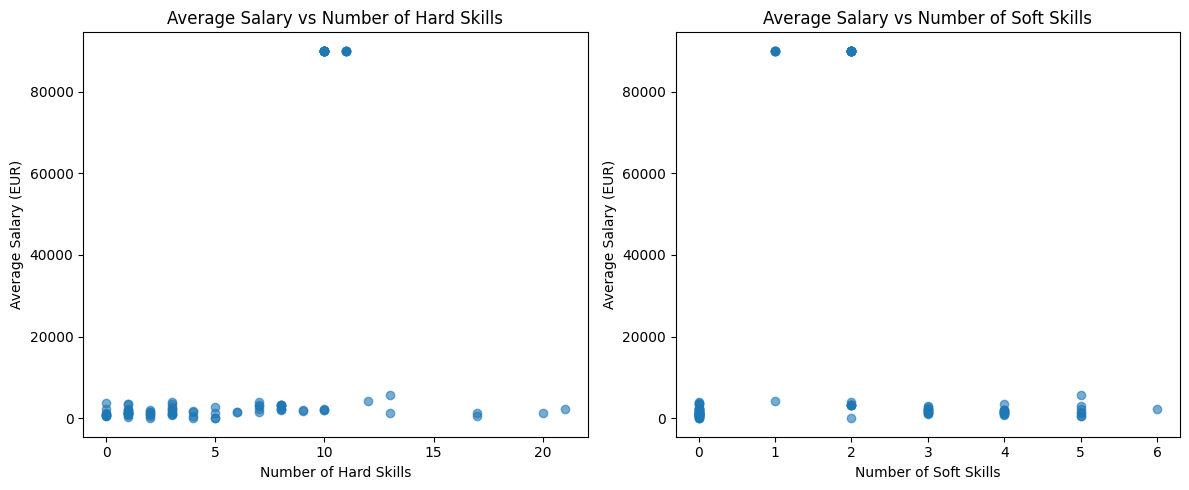

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded and has `salary_min_eur` and `salary_max_eur` from your previous code

# 1. Calculate average salary (mean of min and max salaries)
df['salary_avg_eur'] = df[['salary_min_eur', 'salary_max_eur']].mean(axis=1)

# 2. Count the number of hard and soft skills
df['num_hard_skills'] = df['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_soft_skills'] = df['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# 3. Filter out rows where salary_avg_eur is NaN
df_clean_skills = df.dropna(subset=['salary_avg_eur'])

# 4. Calculate correlations between average salary and number of skills
correlation_skills = df_clean_skills[['salary_avg_eur', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Average Salary vs Number of Skills):\n")
print(correlation_skills)

# 5. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Average Salary vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# 6. Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Average Salary vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills['num_hard_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Hard Skills')
plt.xlabel('Number of Hard Skills')
plt.ylabel('Average Salary (EUR)')

# Scatter plot for Average Salary vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills['num_soft_skills'], df_clean_skills['salary_avg_eur'], alpha=0.6)
plt.title('Average Salary vs Number of Soft Skills')
plt.xlabel('Number of Soft Skills')
plt.ylabel('Average Salary (EUR)')

plt.tight_layout()
plt.show()


## Expected experience and number of skills

Correlation Matrix (Experience vs Number of Skills):

                 experience  num_hard_skills  num_soft_skills
experience         1.000000         0.228941         0.195164
num_hard_skills    0.228941         1.000000         0.435240
num_soft_skills    0.195164         0.435240         1.000000


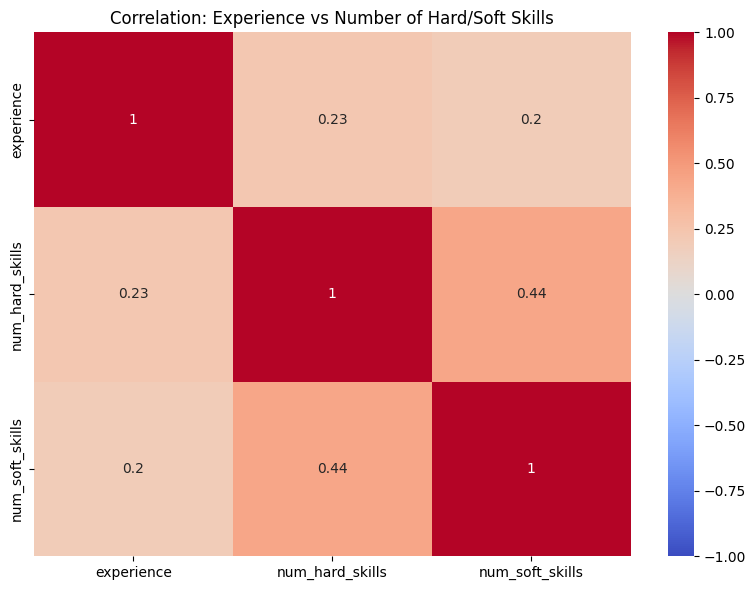

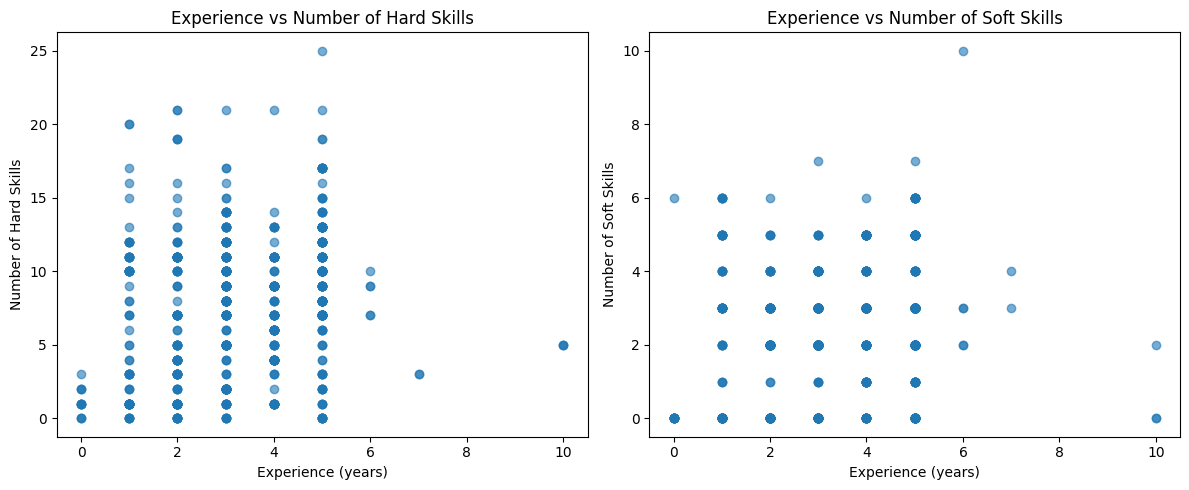

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is already loaded

# Clean rows with NaN in 'experience', 'hard_skills', or 'soft_skills' and create a copy
df_clean_skills_exp = df.dropna(subset=['experience', 'hard_skills', 'soft_skills']).copy()

# Count the number of hard and soft skills
df_clean_skills_exp['num_hard_skills'] = df_clean_skills_exp['hard_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df_clean_skills_exp['num_soft_skills'] = df_clean_skills_exp['soft_skills'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate correlations between experience and number of skills
correlation_exp_skills = df_clean_skills_exp[['experience', 'num_hard_skills', 'num_soft_skills']].corr()

# Print the correlation matrix
print("Correlation Matrix (Experience vs Number of Skills):\n")
print(correlation_exp_skills)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_exp_skills, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation: Experience vs Number of Hard/Soft Skills')
plt.tight_layout()
plt.show()

# Plot scatter plots for better visual understanding
plt.figure(figsize=(12, 5))

# Scatter plot for Experience vs Number of Hard Skills
plt.subplot(1, 2, 1)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_hard_skills'], alpha=0.6)
plt.title('Experience vs Number of Hard Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Hard Skills')

# Scatter plot for Experience vs Number of Soft Skills
plt.subplot(1, 2, 2)
plt.scatter(df_clean_skills_exp['experience'], df_clean_skills_exp['num_soft_skills'], alpha=0.6)
plt.title('Experience vs Number of Soft Skills')
plt.xlabel('Experience (years)')
plt.ylabel('Number of Soft Skills')

plt.tight_layout()
plt.show()


# Skill coocurences

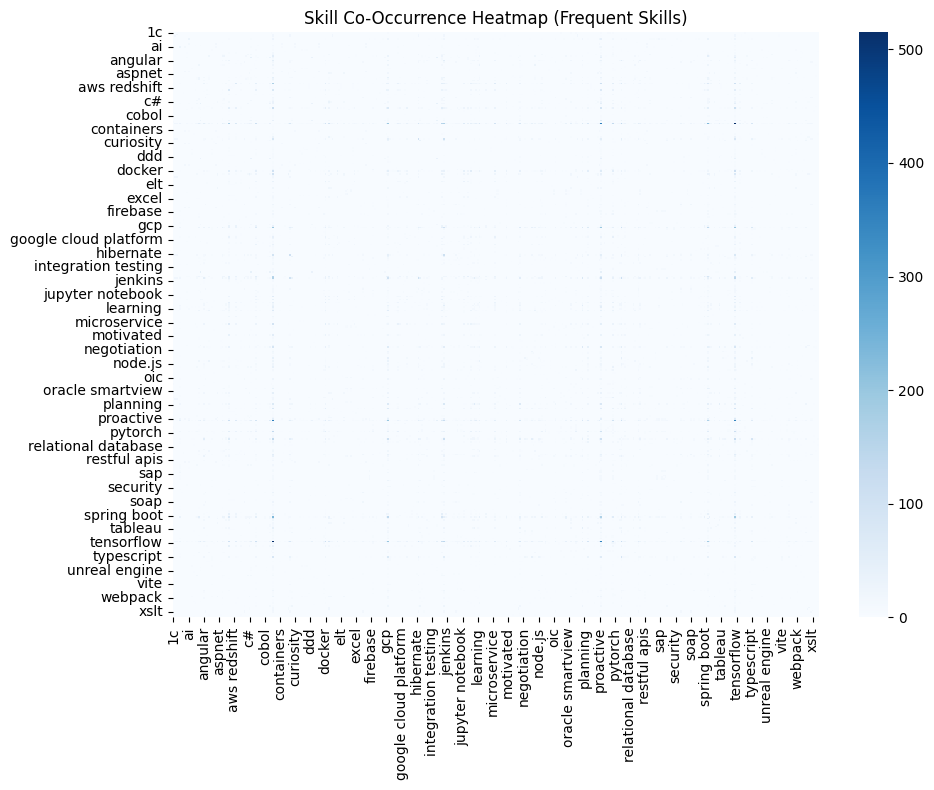

Top Skill Co-Occurrences:
communication & teamwork: 515 jobs
communication & problem solving: 357 jobs
problem solving & teamwork: 349 jobs
communication & sql: 232 jobs
git & teamwork: 203 jobs
communication & git: 198 jobs
git & problem solving: 198 jobs
sql & teamwork: 189 jobs
aws & communication: 170 jobs
problem solving & sql: 167 jobs
communication & javascript: 163 jobs
communication & java: 154 jobs
javascript & teamwork: 142 jobs
git & sql: 139 jobs
communication & react: 137 jobs
communication & python: 132 jobs
react & teamwork: 124 jobs
javascript & problem solving: 122 jobs
java & teamwork: 122 jobs
javascript & react: 114 jobs
aws & problem solving: 113 jobs
cicd & communication: 113 jobs
python & teamwork: 112 jobs
docker & teamwork: 111 jobs
html & javascript: 110 jobs
git & react: 110 jobs
cicd & teamwork: 109 jobs
aws & teamwork: 108 jobs
problem solving & react: 108 jobs
css & html: 107 jobs
git & javascript: 104 jobs
problem solving & python: 102 jobs
css & javascr

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

# Assuming df is already loaded
# Flatten all skills (hard + soft) into a single list per job
df['all_skills'] = df['hard_skills'] + df['soft_skills']

# Step 1: Collect unique skills incrementally and count frequencies
skill_counts = {}
for skills in df['all_skills']:
    for skill in skills:
        skill_counts[skill] = skill_counts.get(skill, 0) + 1

# Step 2: Filter skills appearing in at least 3 jobs
min_appearances = 3
frequent_skills = [skill for skill, count in skill_counts.items() if count >= min_appearances]
frequent_skills.sort()  # Sort for consistent ordering
skill_to_idx = {skill: idx for idx, skill in enumerate(frequent_skills)}

# Step 3: Create co-occurrence matrix using numpy
n_skills = len(frequent_skills)
co_occurrence_np = np.zeros((n_skills, n_skills), dtype=int)
for skills in df['all_skills']:
    # Only consider frequent skills
    job_skills = [skill for skill in skills if skill in skill_to_idx]
    skill_indices = [skill_to_idx[skill] for skill in job_skills]
    for i, j in combinations(skill_indices, 2):
        co_occurrence_np[i, j] += 1
        co_occurrence_np[j, i] += 1

# Convert to DataFrame for plotting
co_occurrence = pd.DataFrame(co_occurrence_np, index=frequent_skills, columns=frequent_skills)

# Step 4: Visualize as a heatmap
plt.figure(figsize=(10, 8))
annot = len(frequent_skills) <= 15
sns.heatmap(co_occurrence, cmap='Blues', annot=annot, fmt='d')
plt.title('Skill Co-Occurrence Heatmap (Frequent Skills)')
plt.tight_layout()
plt.show()

# Step 5: Alternative visualization - Bar chart of top co-occurrences
co_occurrence_stack = co_occurrence.where(np.triu(np.ones(co_occurrence.shape), k=1).astype(bool)).stack()
top_co_occurrences = co_occurrence_stack[co_occurrence_stack > 0].sort_values(ascending=False).head(50)

# Print top co-occurrences
print("Top Skill Co-Occurrences:")
for (skill1, skill2), count in top_co_occurrences.items():
    print(f"{skill1} & {skill2}: {int(count)} jobs")